# Introduction

This package provides functions to perform least-squares fits of quasinormal modes to ringdown waveforms. As long as you have a timeseries (either a single array or a dictionary of spherical-harmonic modes) you can use the functions provided by this package to perform fits.

In addition, some waveform classes are provided for convenience. These provide flux calculations and frame transformations which can be useful when doing ringdown analyses. Currently, there are three types of waveform class which the user can initialise:

 - **SXS**: Loads a waveform from the SXS catalog. This makes use of the `sxs` Python package to automatically download the simulation, so that you only need to specify the ID. 

 - **Surrogate**: Initializes a waveform generated by a surrogate. Currently implemented are **NRSur7dq4** and **NRHybSur3dq8**.

 - **Custom**: The user provides a dictionary of modes. 

The core fitting functions are all available in the `qnmfits.py` file. The waveform classes are in the `Waveforms` folder, and each inherit functions from `Waveforms/Base.BaseClass`.

# Analysing a SXS waveform

To demonstrate the features of the code we will work with the simulation SXS:BBH:0305, but everything will apply to a generic waveform.

## Class initialization

The only required argument for an SXS waveform is a simulation ID. However, it is a good idea to also change the zero-time to something more useful. Here we use the peak of the absolute value of the (2,2) mode (see the `Simulation` docstring for other options, including the ability to transform the modes with a rotation).

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfits
import os
qnmfits.download_cook_data()


sims = []
ids = [305, 1476, 1477, 1481, 1492, 1495, 1497, 1499, 1500, 1501, 1502, 1503, 1506, 1507, 1509] #1475, causes an error
for id in ids:
    sims.append(qnmfits.SXS(ID=id, zero_time=(2,2)))
    
sim = sims[0]

KerrQNM_08.h5 already downloaded.
KerrQNM_09.h5 already downloaded.
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:1476v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1476v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:1477v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1477v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:1481v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1481v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:1492

In [44]:
ringdown_dir = 'figures/ringdown/'

In [45]:
sim.times

array([-1804.13791279, -1803.5032643 , -1802.86745264, ...,
         151.47421942,   151.57421365,   151.67420788])

In [46]:
# Time:
sim.times

# 22 mode
sim.h[2,2] # = hplus + i hcross

# Can you make a plot of 

array([ 1.15232258e-01-7.78880531e-04j,  1.15176171e-01-3.98142937e-03j,
        1.15030718e-01-7.18773693e-03j, ...,
       -6.71559606e-06-2.00978043e-05j, -6.84145863e-06-2.01459511e-05j,
       -6.96868187e-06-2.01867676e-05j])

Saved ringdownplus305.png
Saved ringdownplus1476.png
Saved ringdownplus1477.png
Saved ringdownplus1481.png
Saved ringdownplus1492.png
Saved ringdownplus1495.png
Saved ringdownplus1497.png
Saved ringdownplus1499.png
Saved ringdownplus1500.png
Saved ringdownplus1501.png
Saved ringdownplus1502.png
Saved ringdownplus1503.png
Saved ringdownplus1506.png
Saved ringdownplus1507.png
Saved ringdownplus1509.png


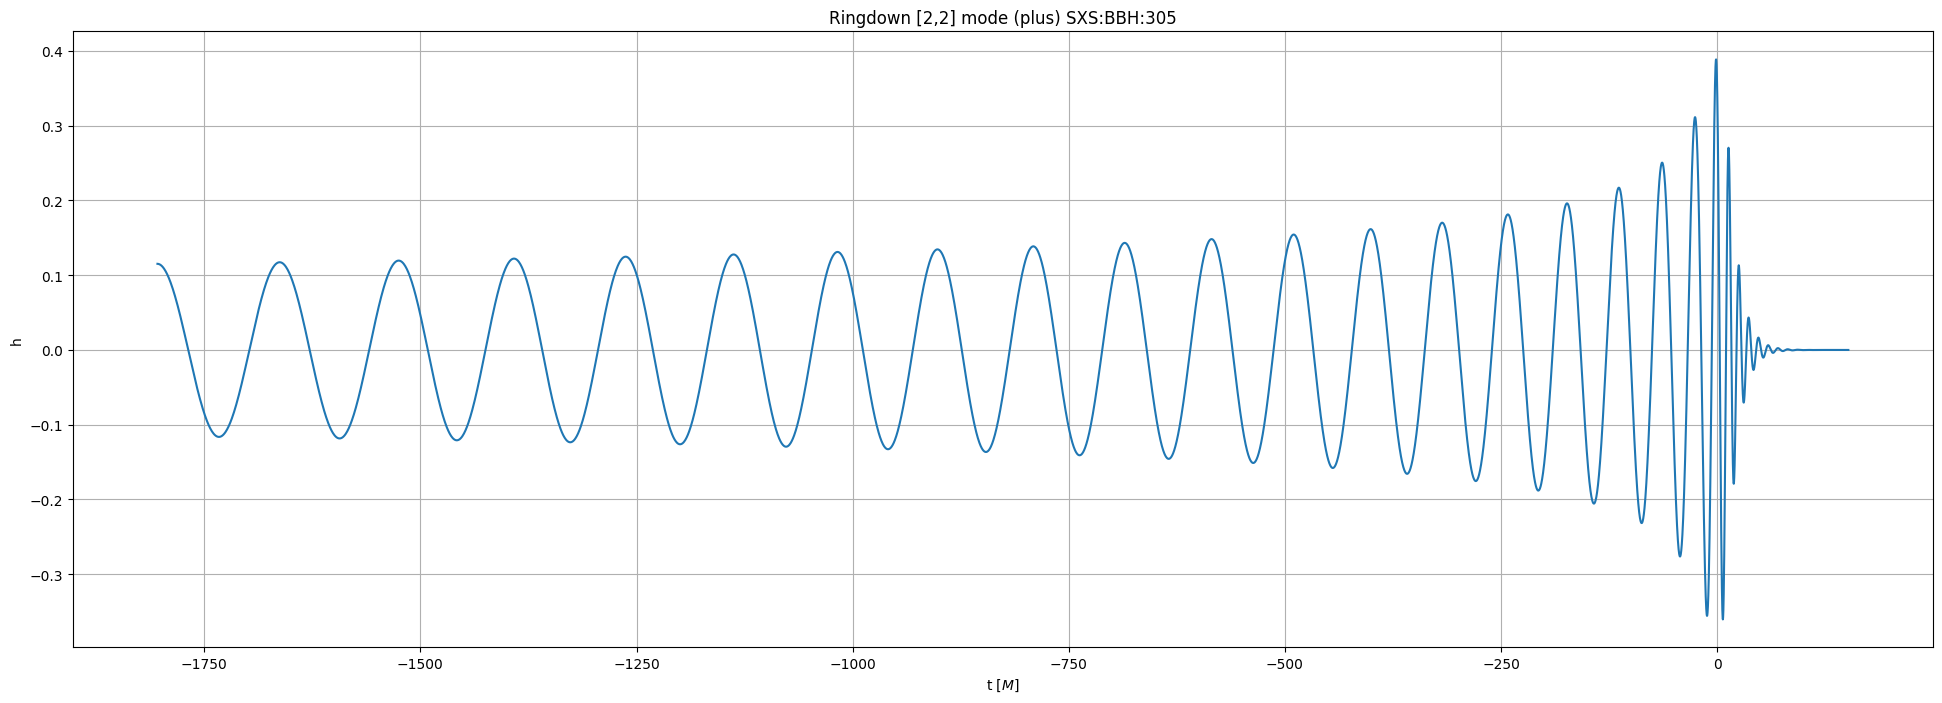

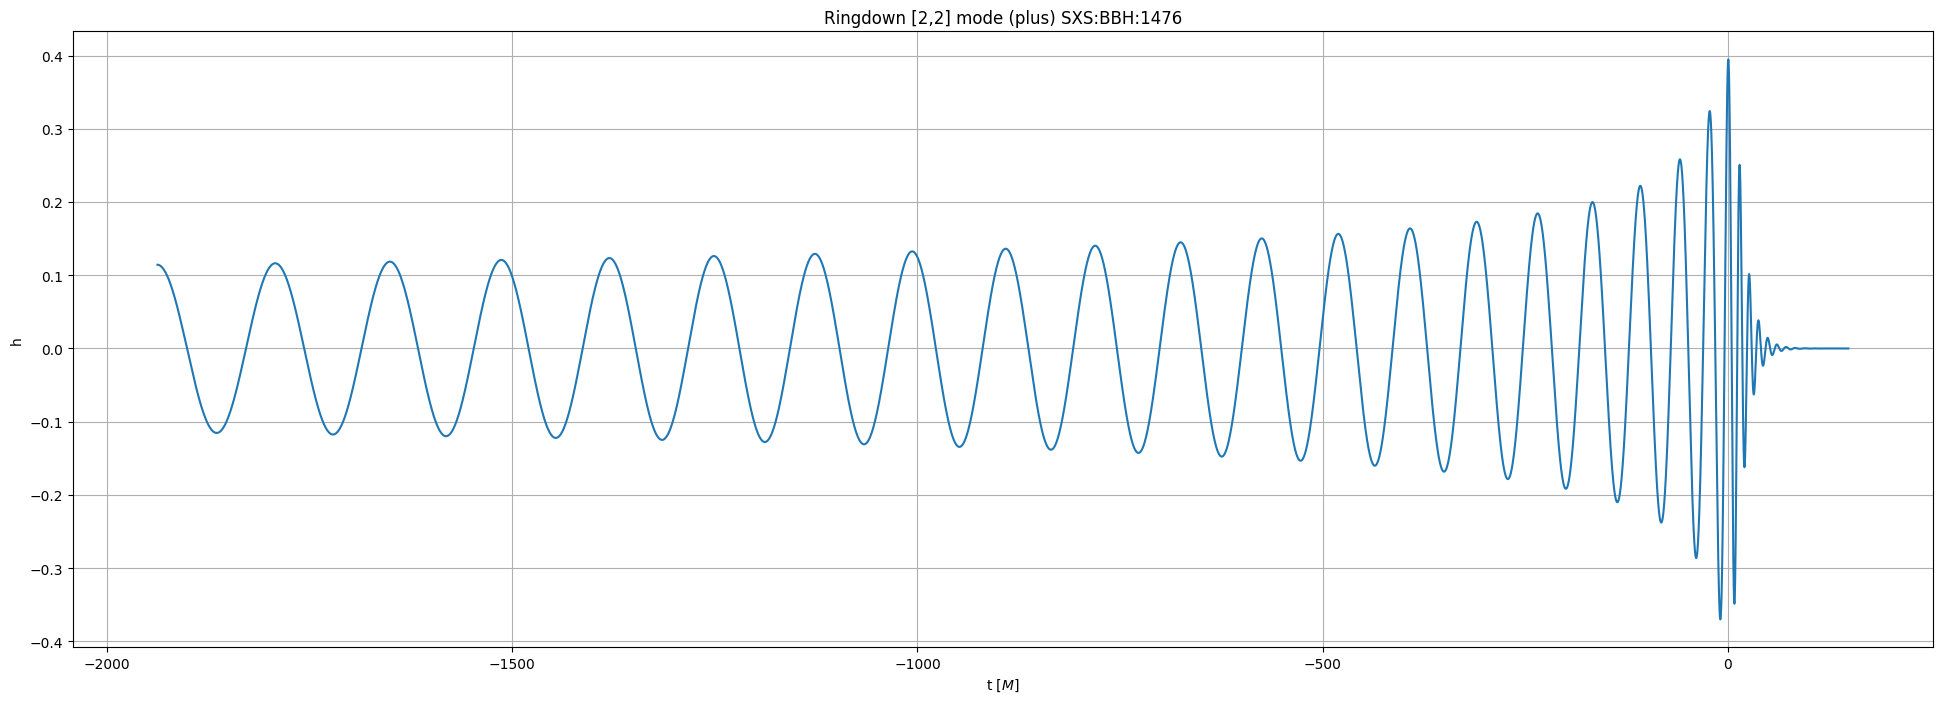

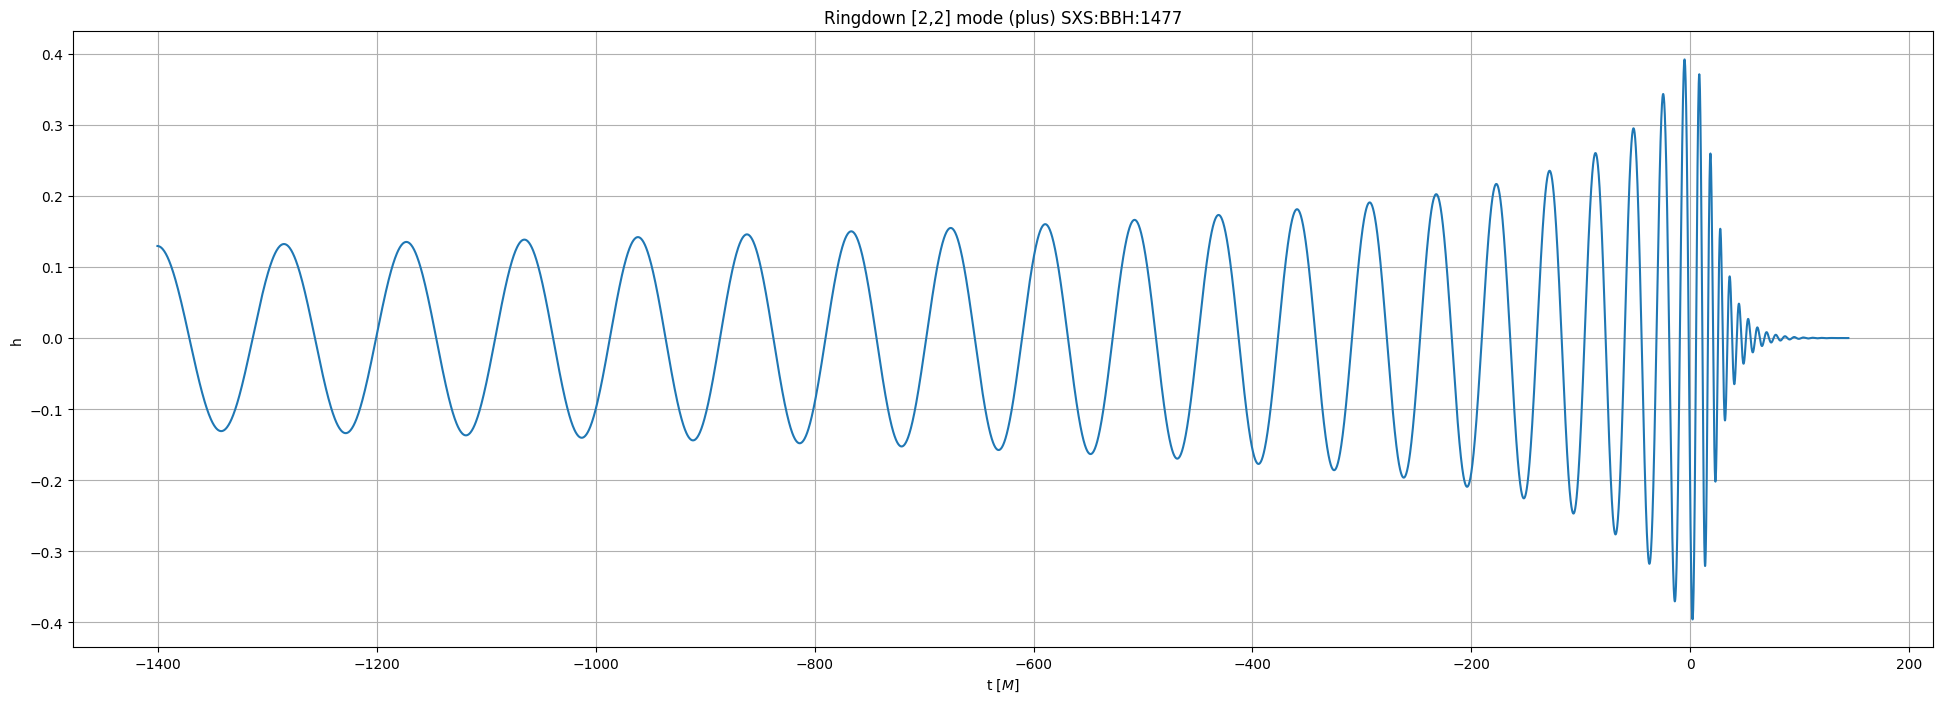

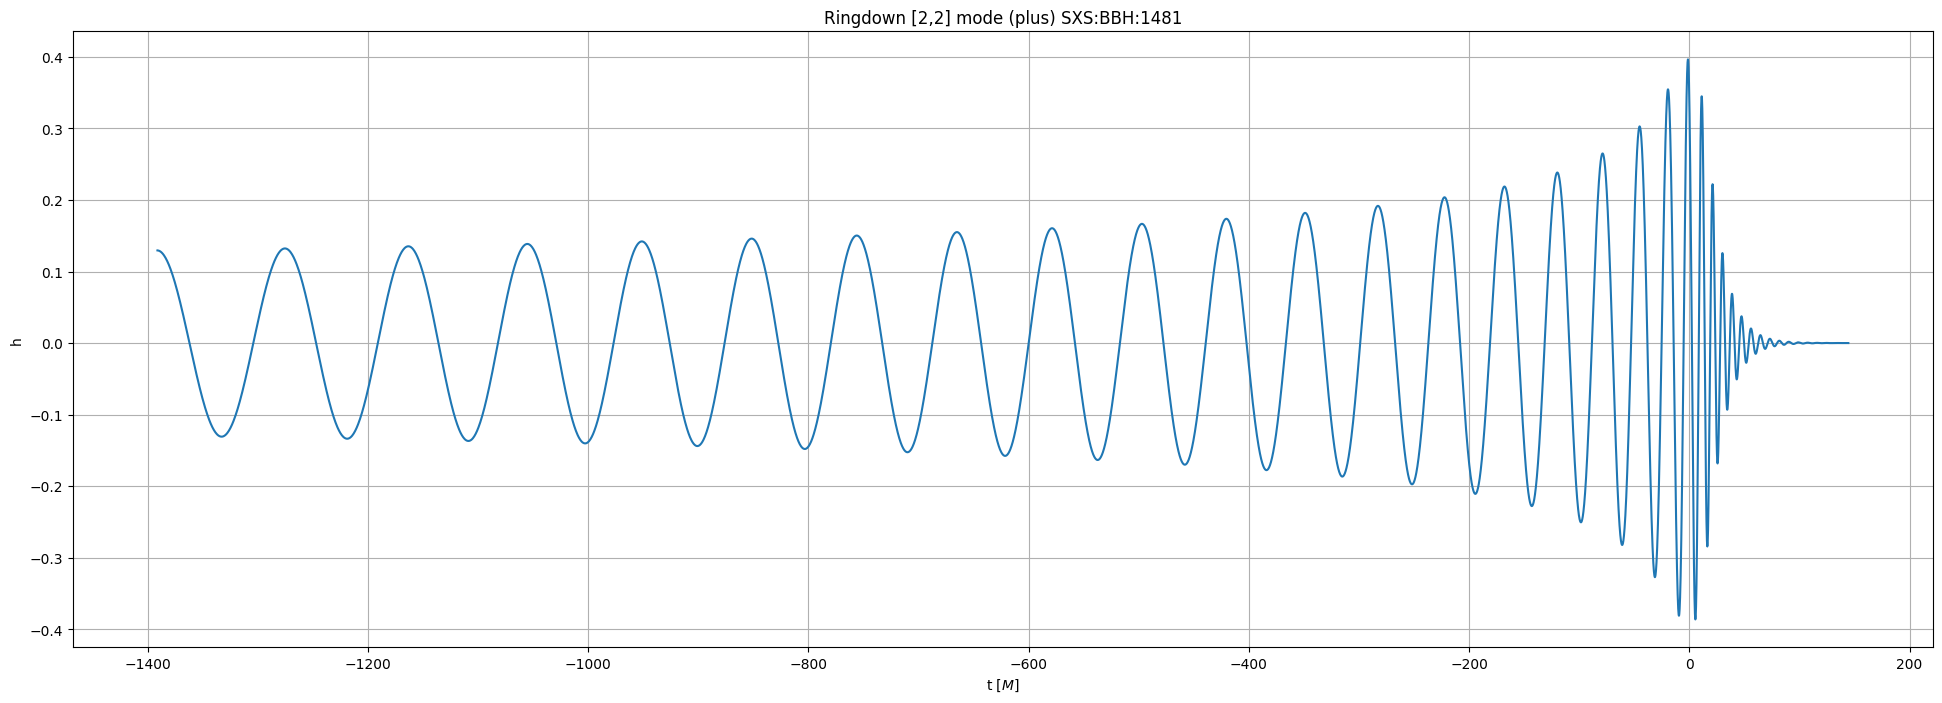

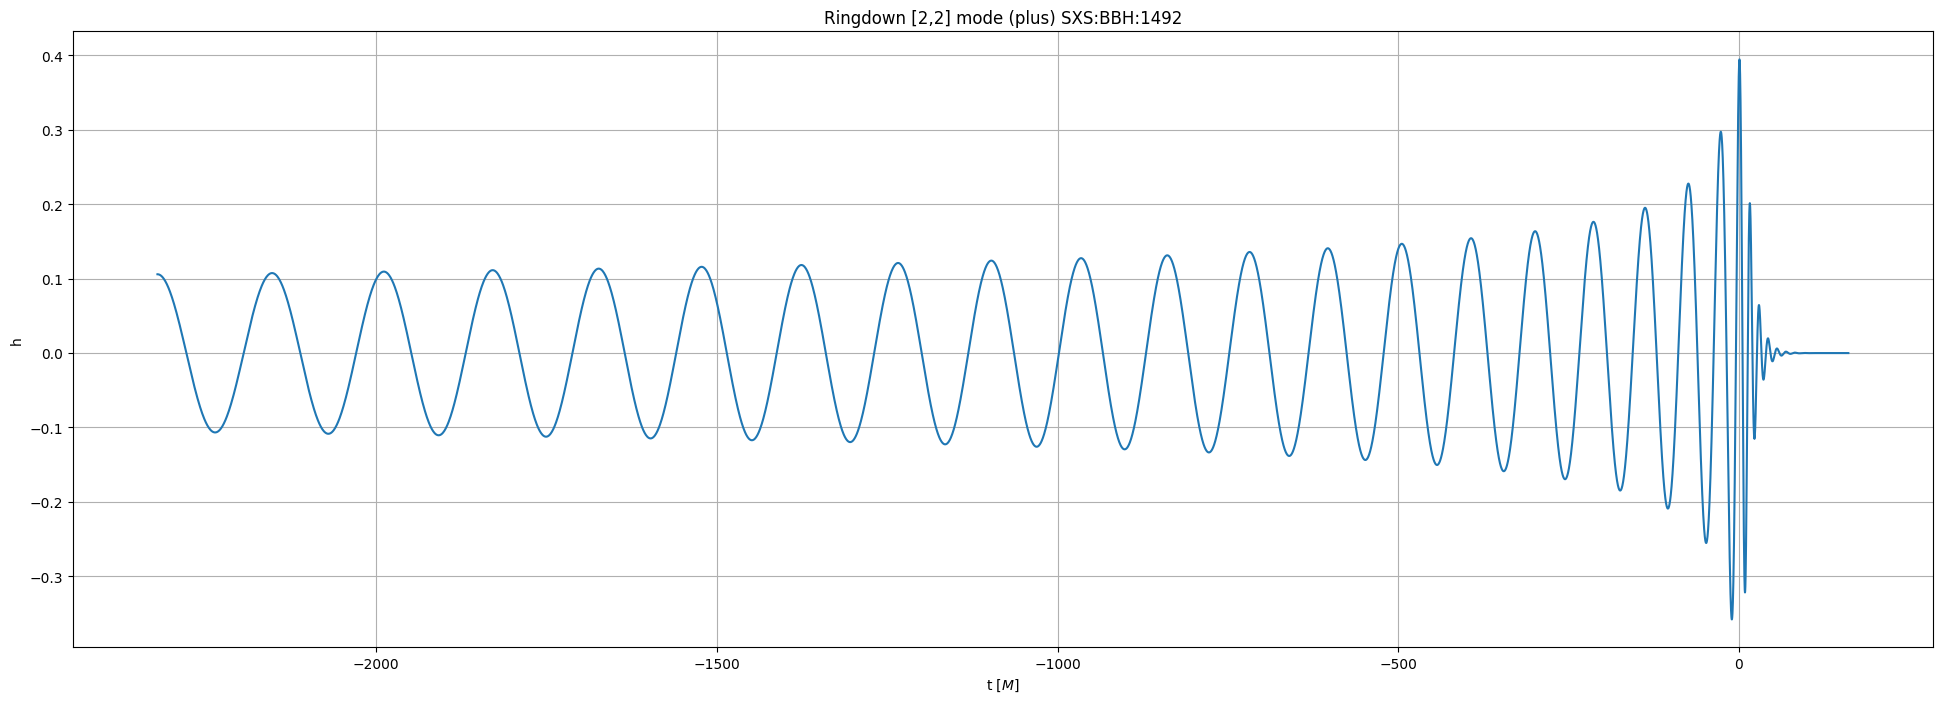

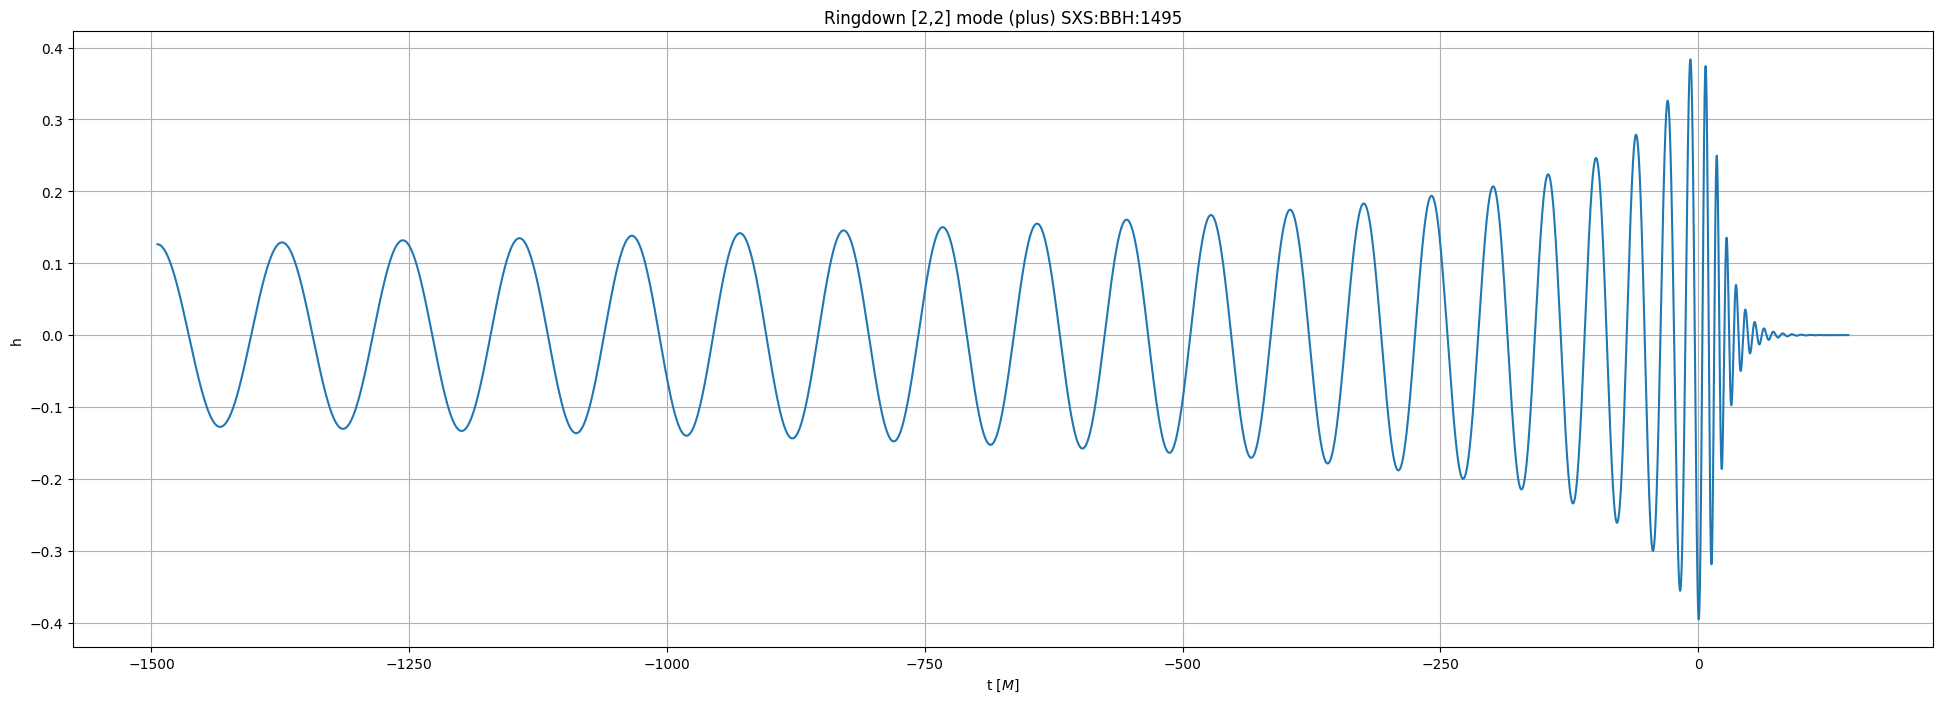

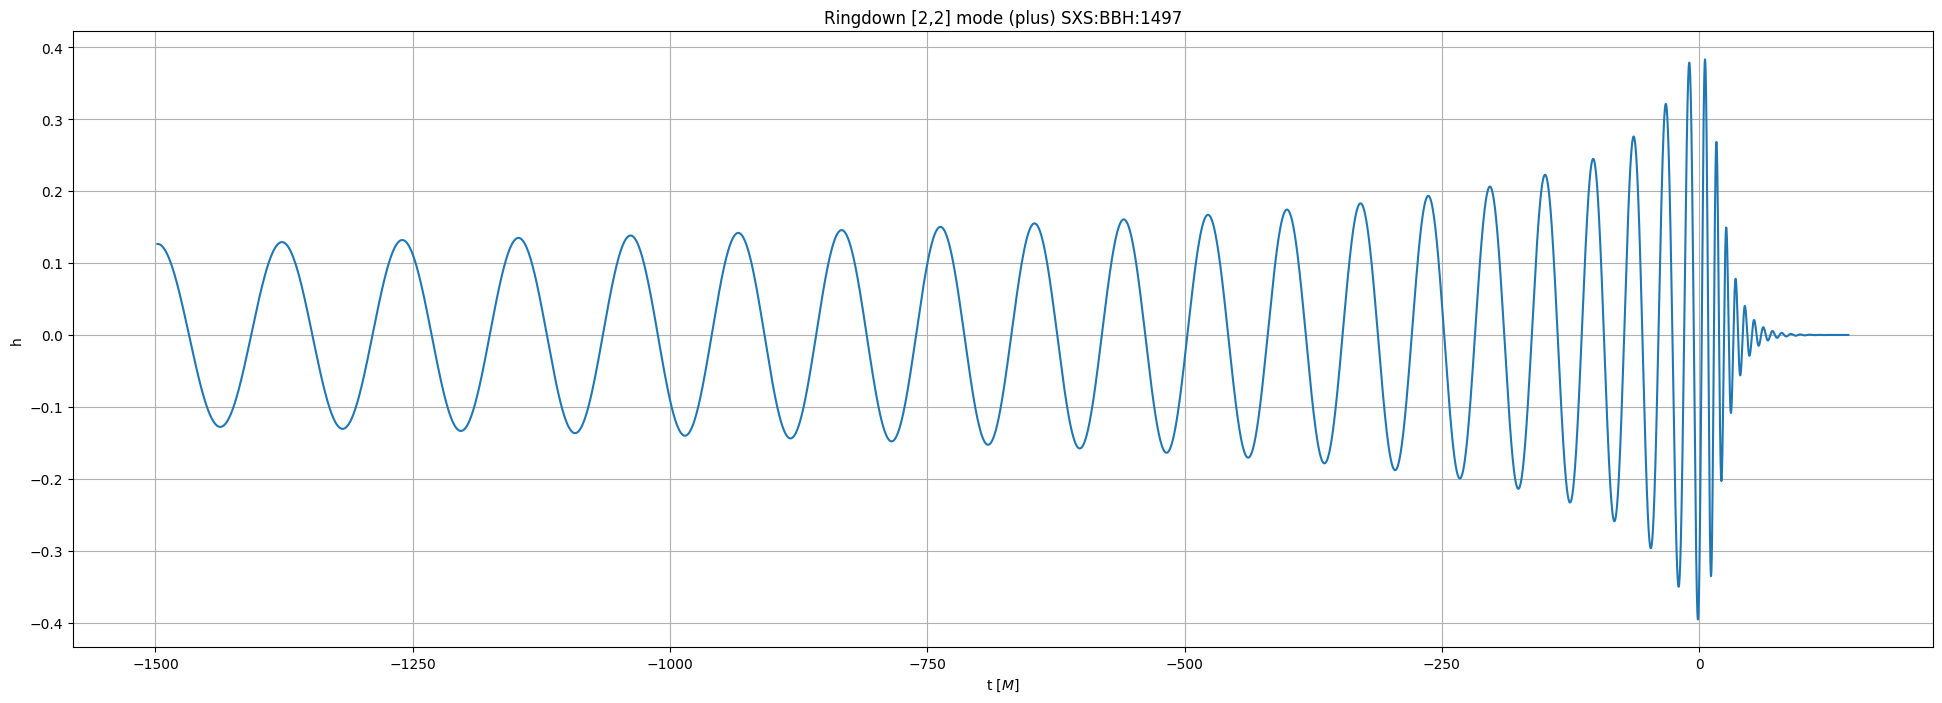

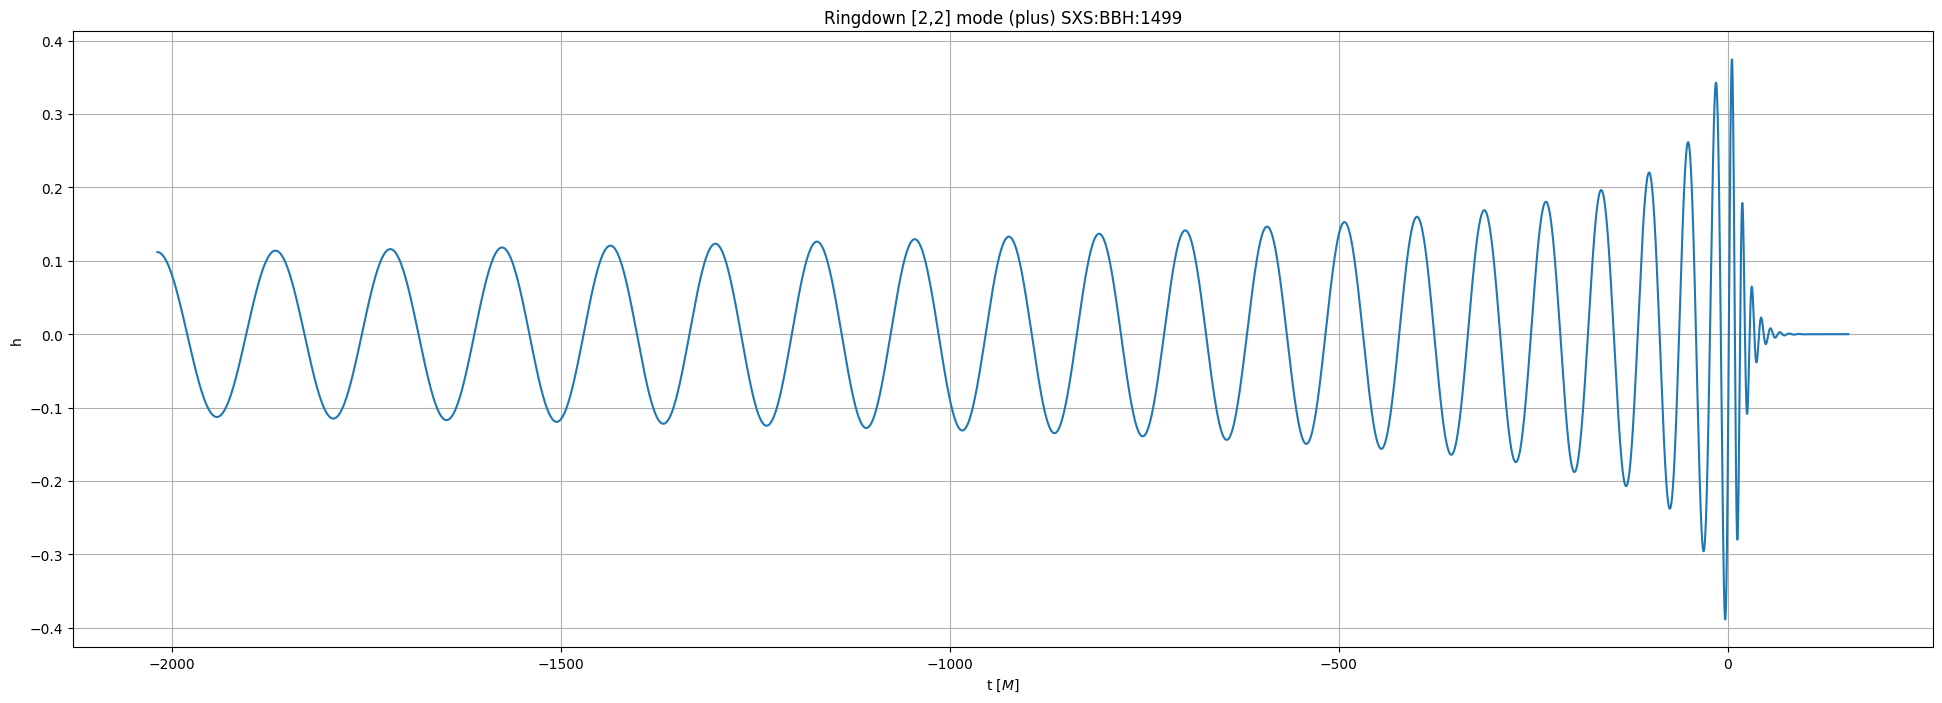

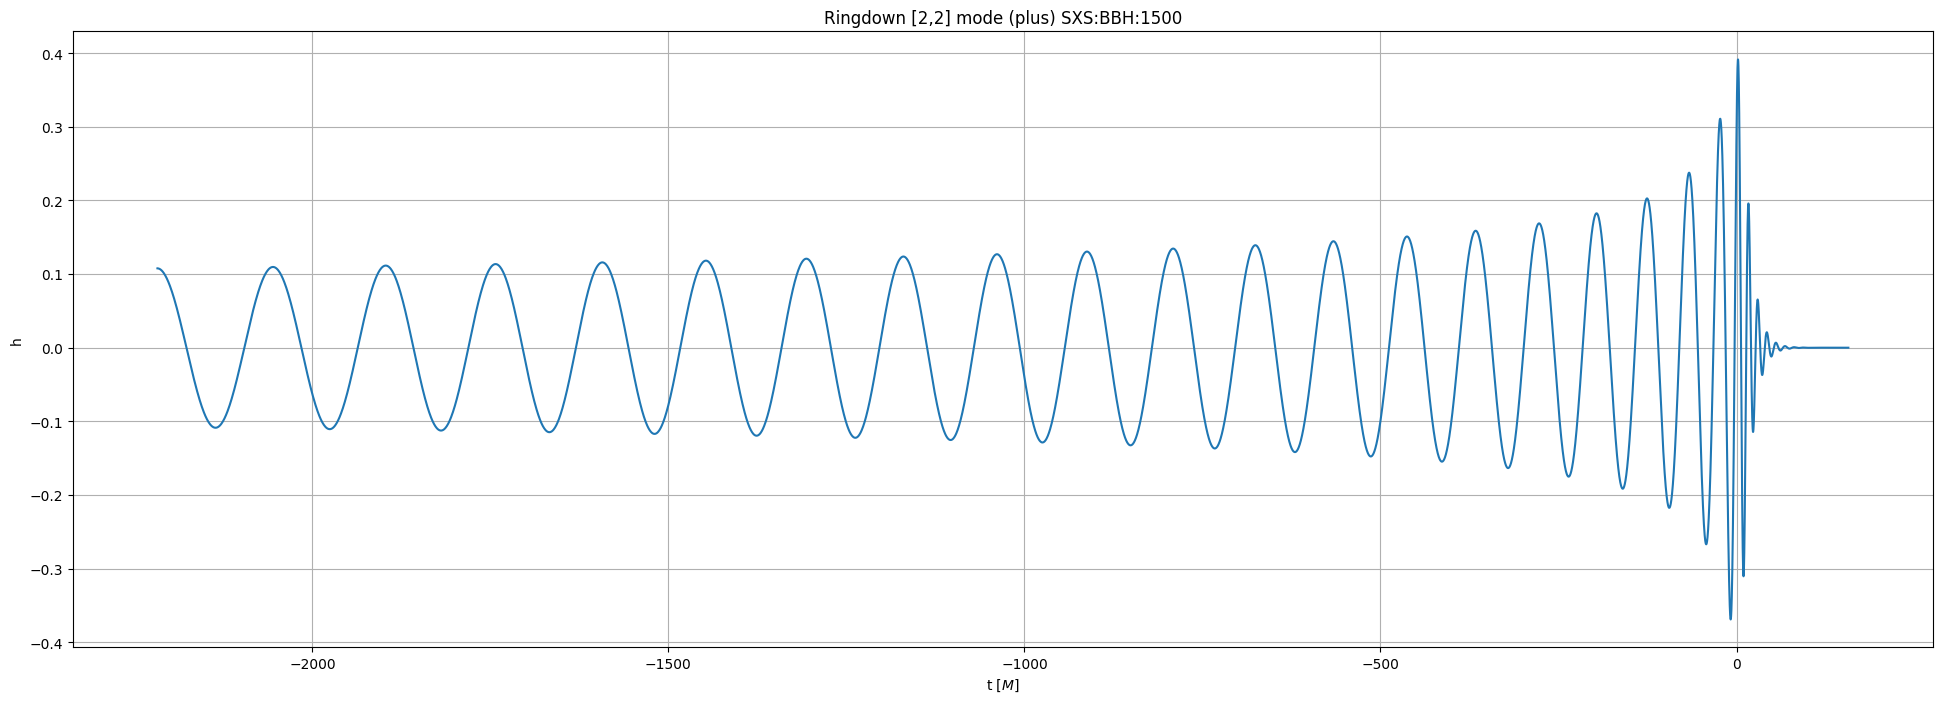

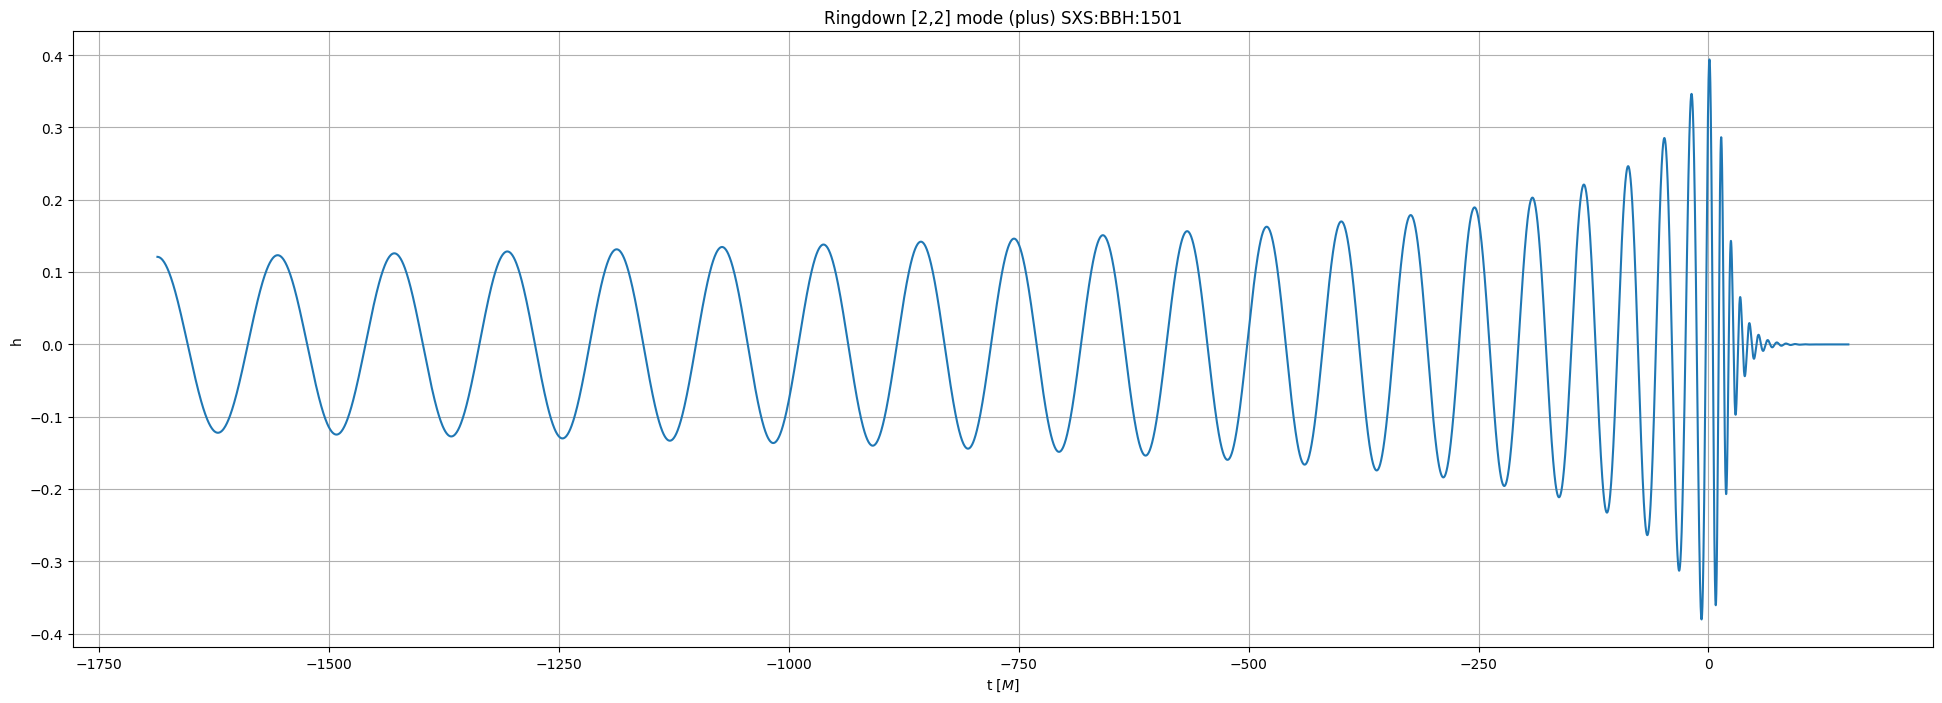

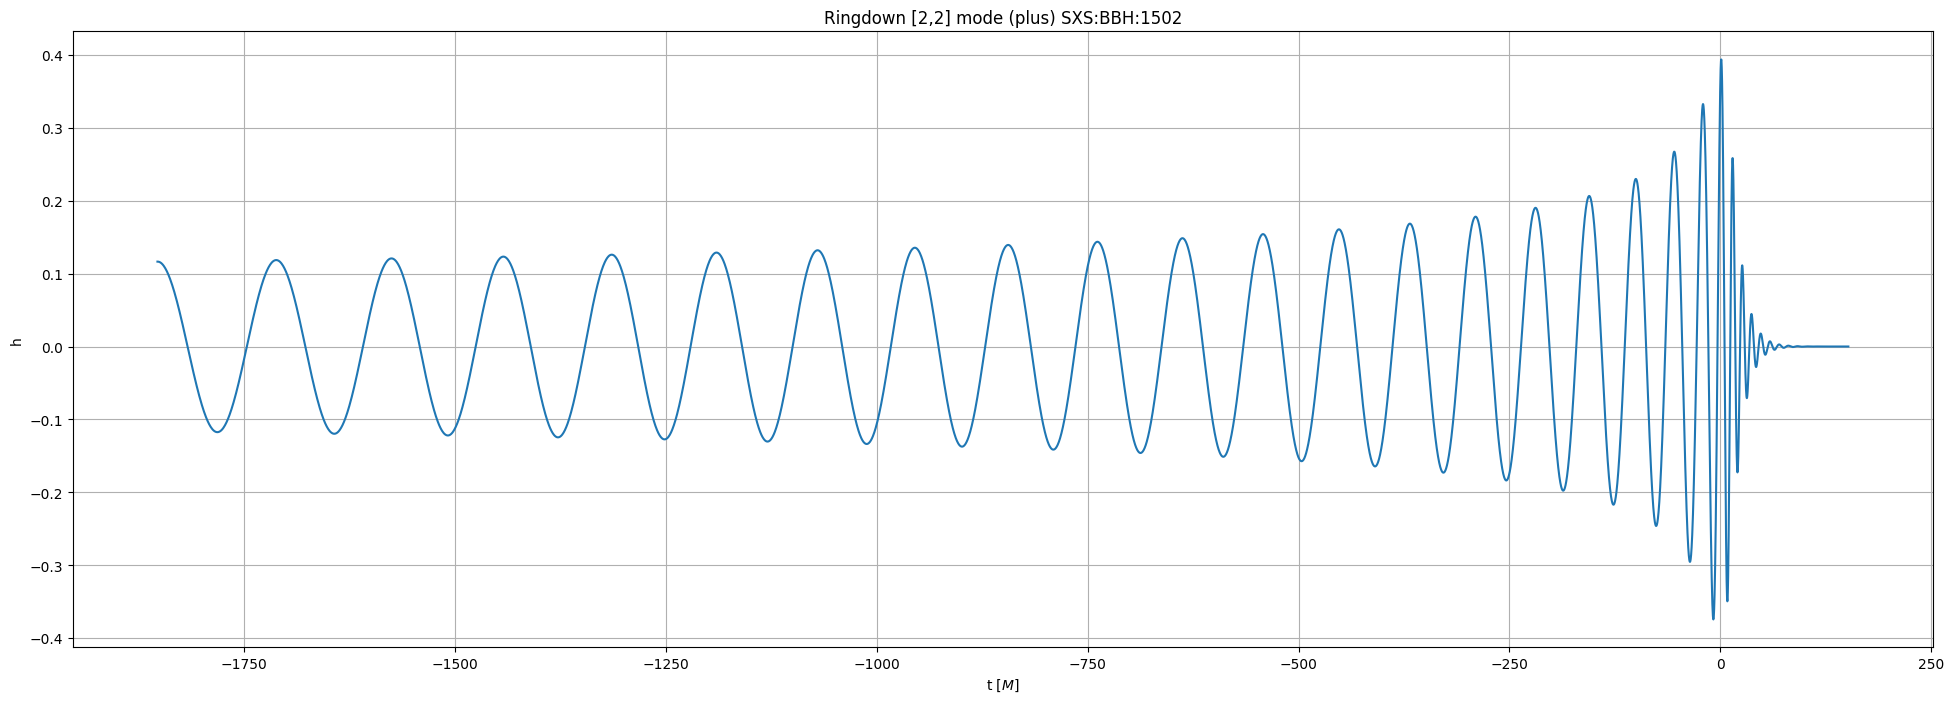

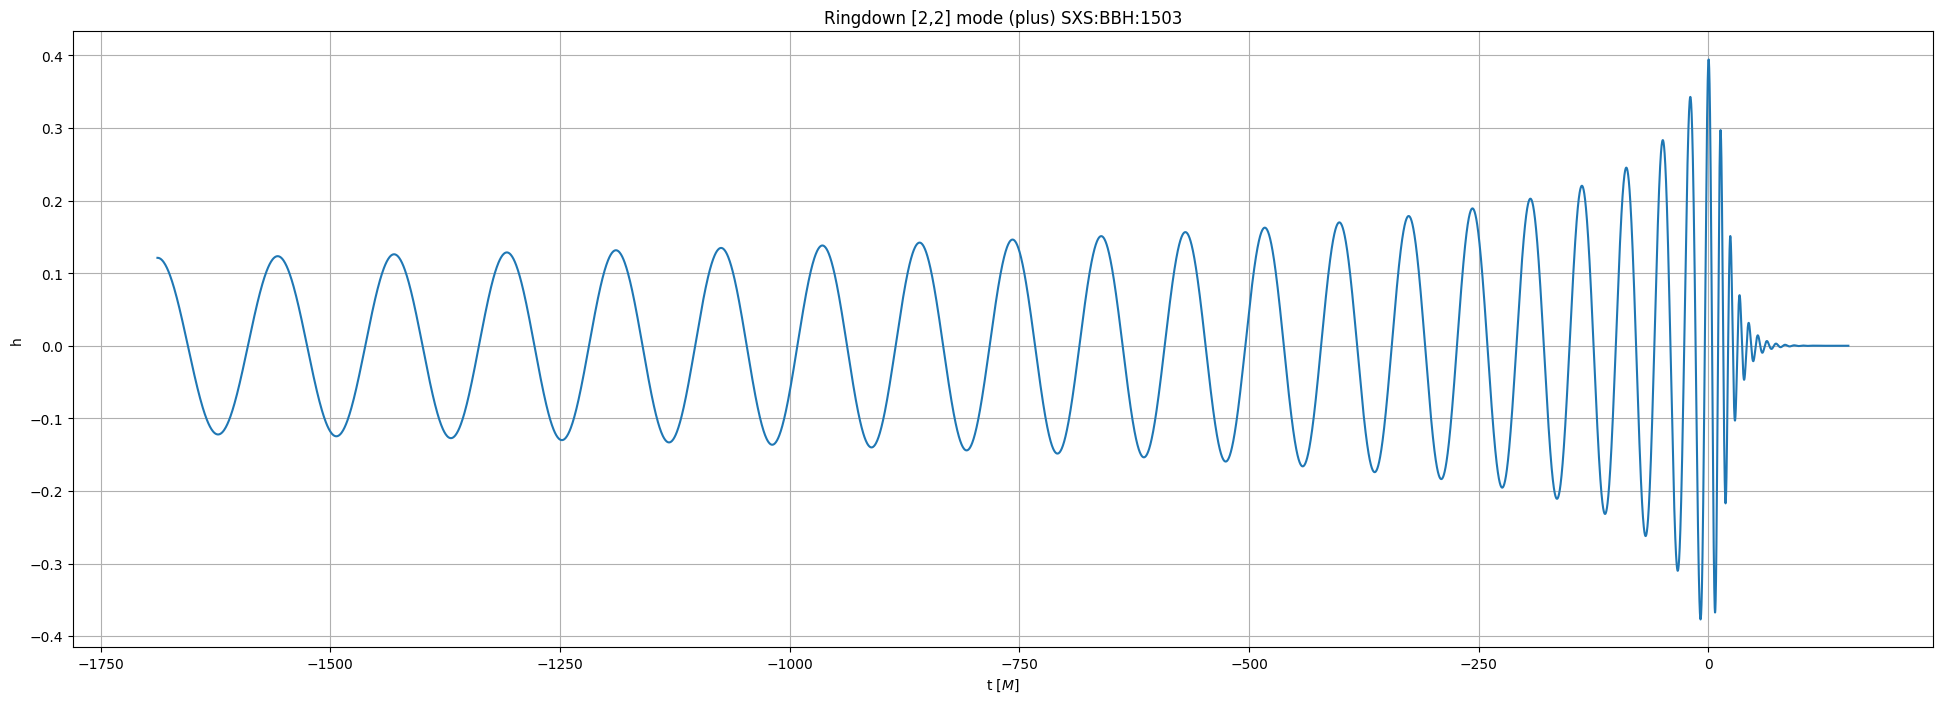

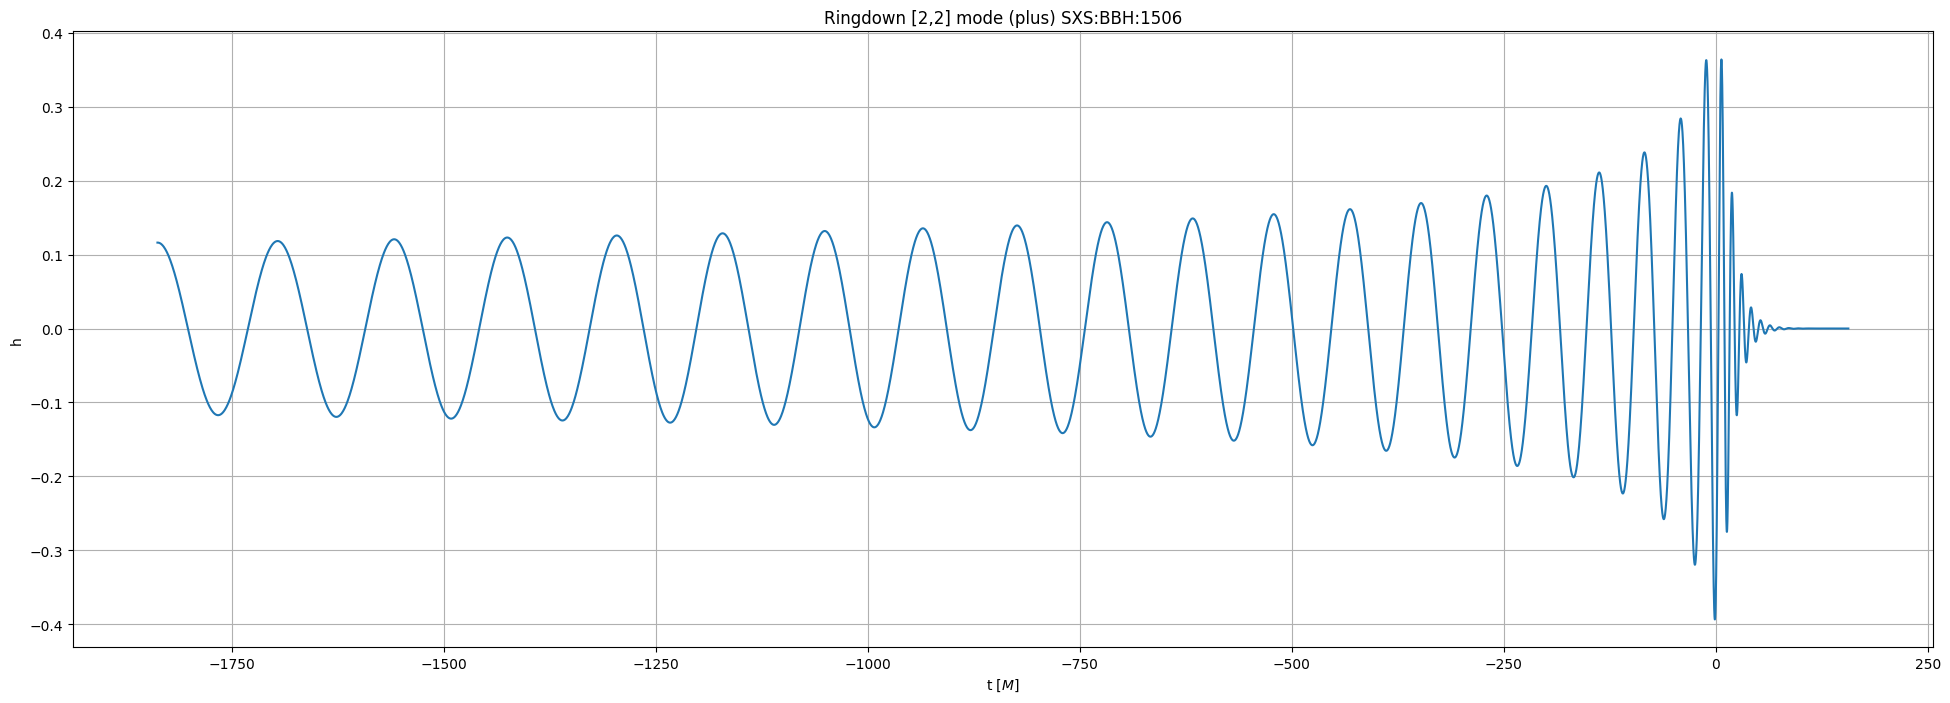

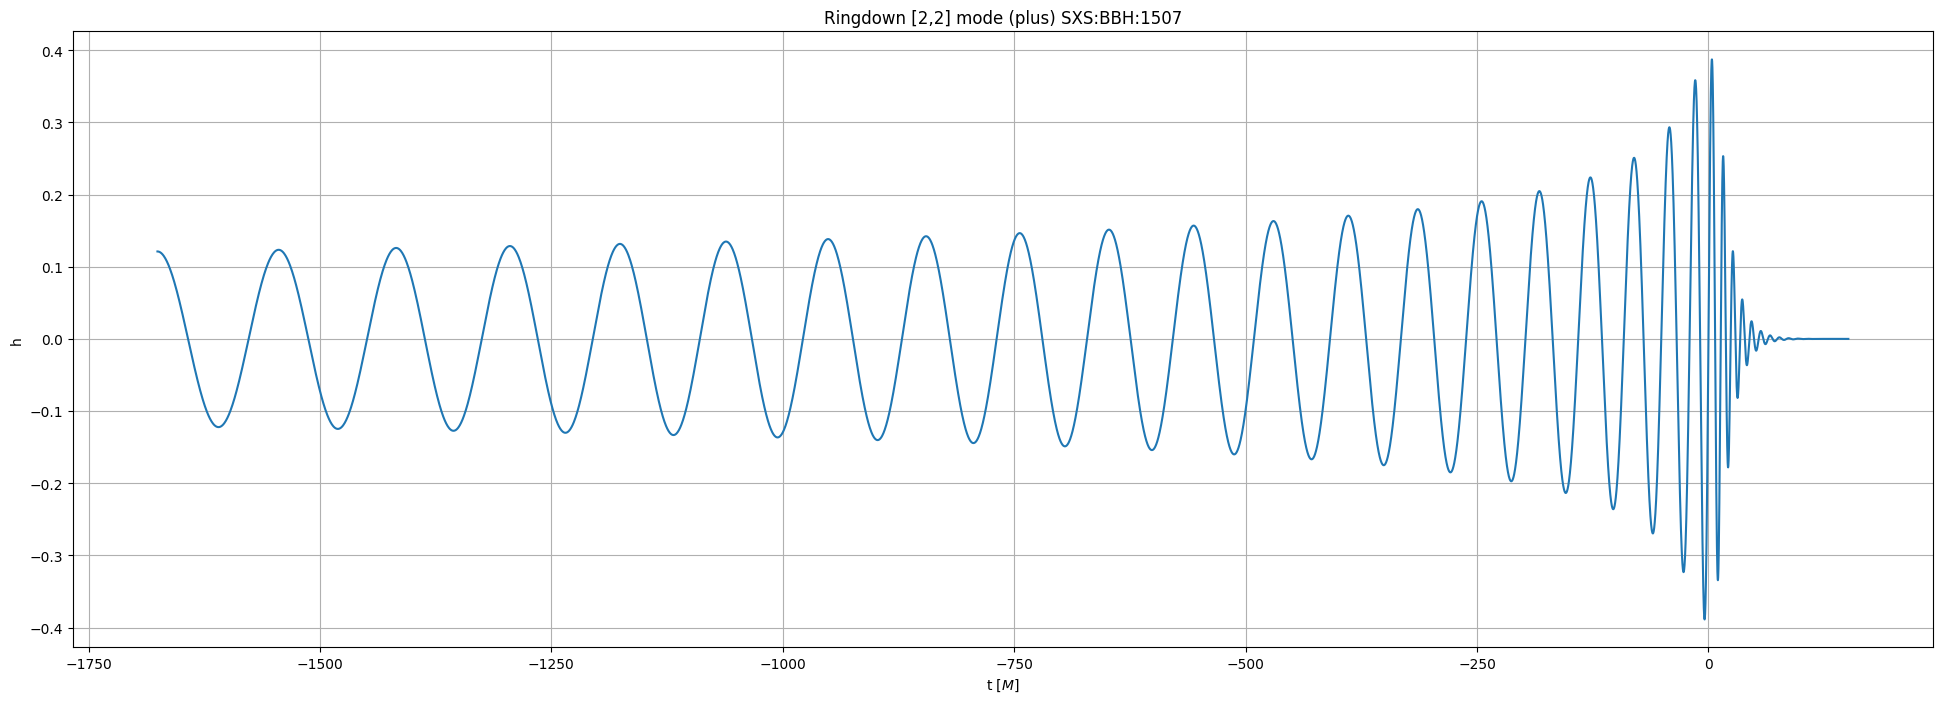

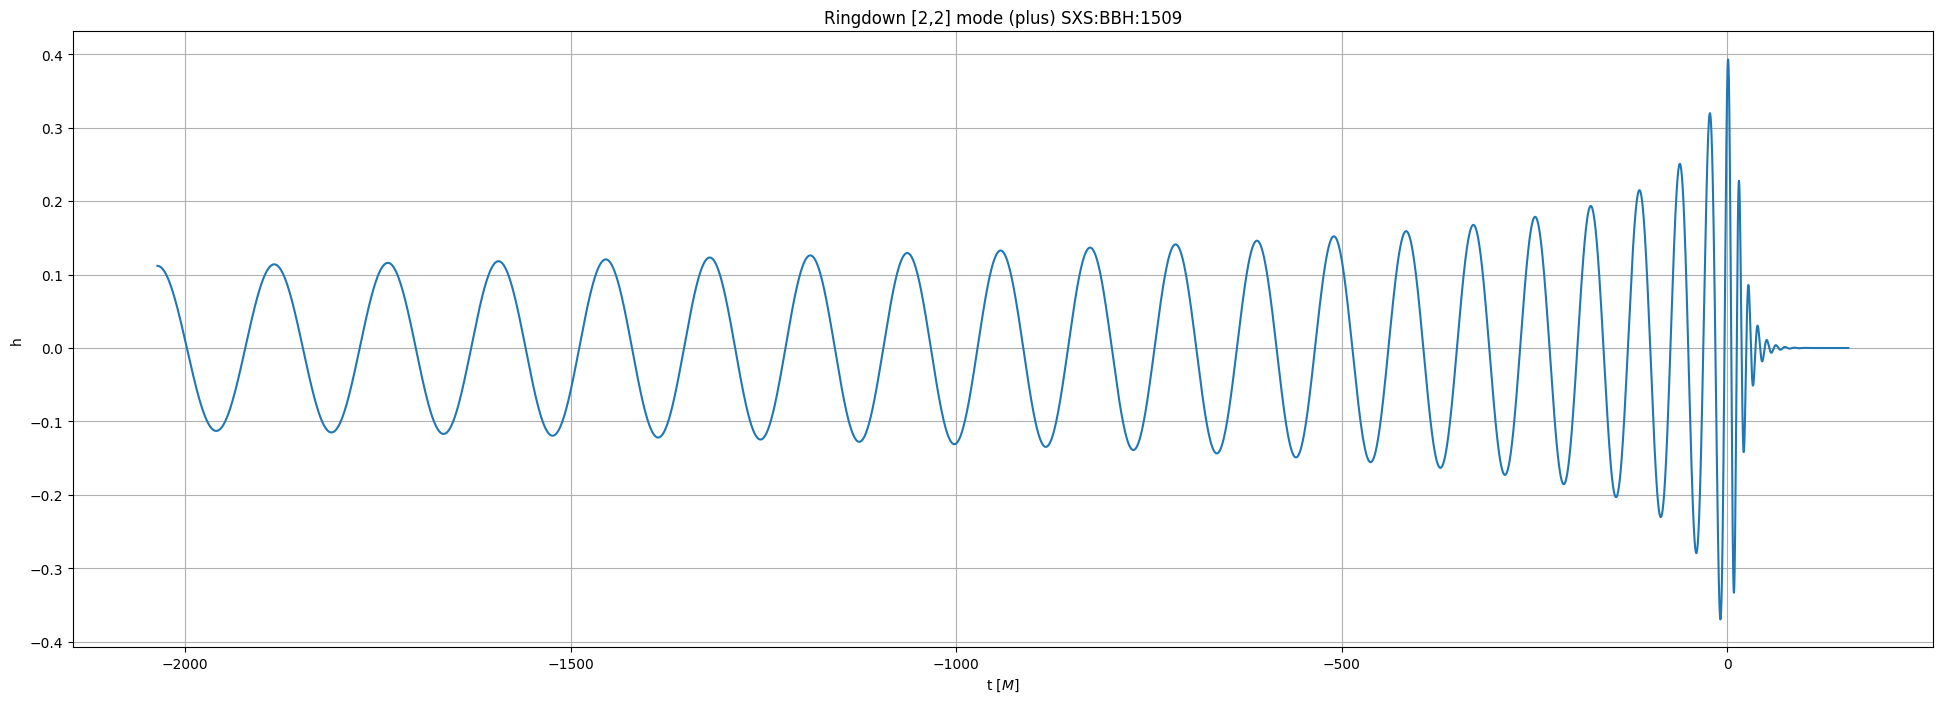

In [49]:
for (sim,ind) in zip(sims,ids):
    fig, ax = plt.subplots(figsize=(24,8))
    ax.plot(sim.times, np.real(sim.h[2,2]))
    ax.grid(which='both')
    ax.set_title(r'Ringdown [2,2] mode (plus) SXS:BBH:' + str(ind))
    ax.set_xlabel(r't [$M$]')
    ax.set_ylabel('h')
    #ax.set_xlim(0,150)

    #plt.savefig('ringdownplus.png', dpi=500, bbox_inches='tight')

    # Save figure
    if not os.path.exists(ringdown_dir):
        os.makedirs(ringdown_dir)
    plt.savefig(ringdown_dir + 'ringdownplus' + str(ind) + '.png', dpi=500, bbox_inches='tight')
    print('Saved ringdownplus' + str(ind) + '.png')


Saved ringdowncross305.png
Saved ringdowncross1476.png
Saved ringdowncross1477.png
Saved ringdowncross1481.png
Saved ringdowncross1492.png
Saved ringdowncross1495.png
Saved ringdowncross1497.png
Saved ringdowncross1499.png
Saved ringdowncross1500.png
Saved ringdowncross1501.png
Saved ringdowncross1502.png
Saved ringdowncross1503.png
Saved ringdowncross1506.png
Saved ringdowncross1507.png
Saved ringdowncross1509.png


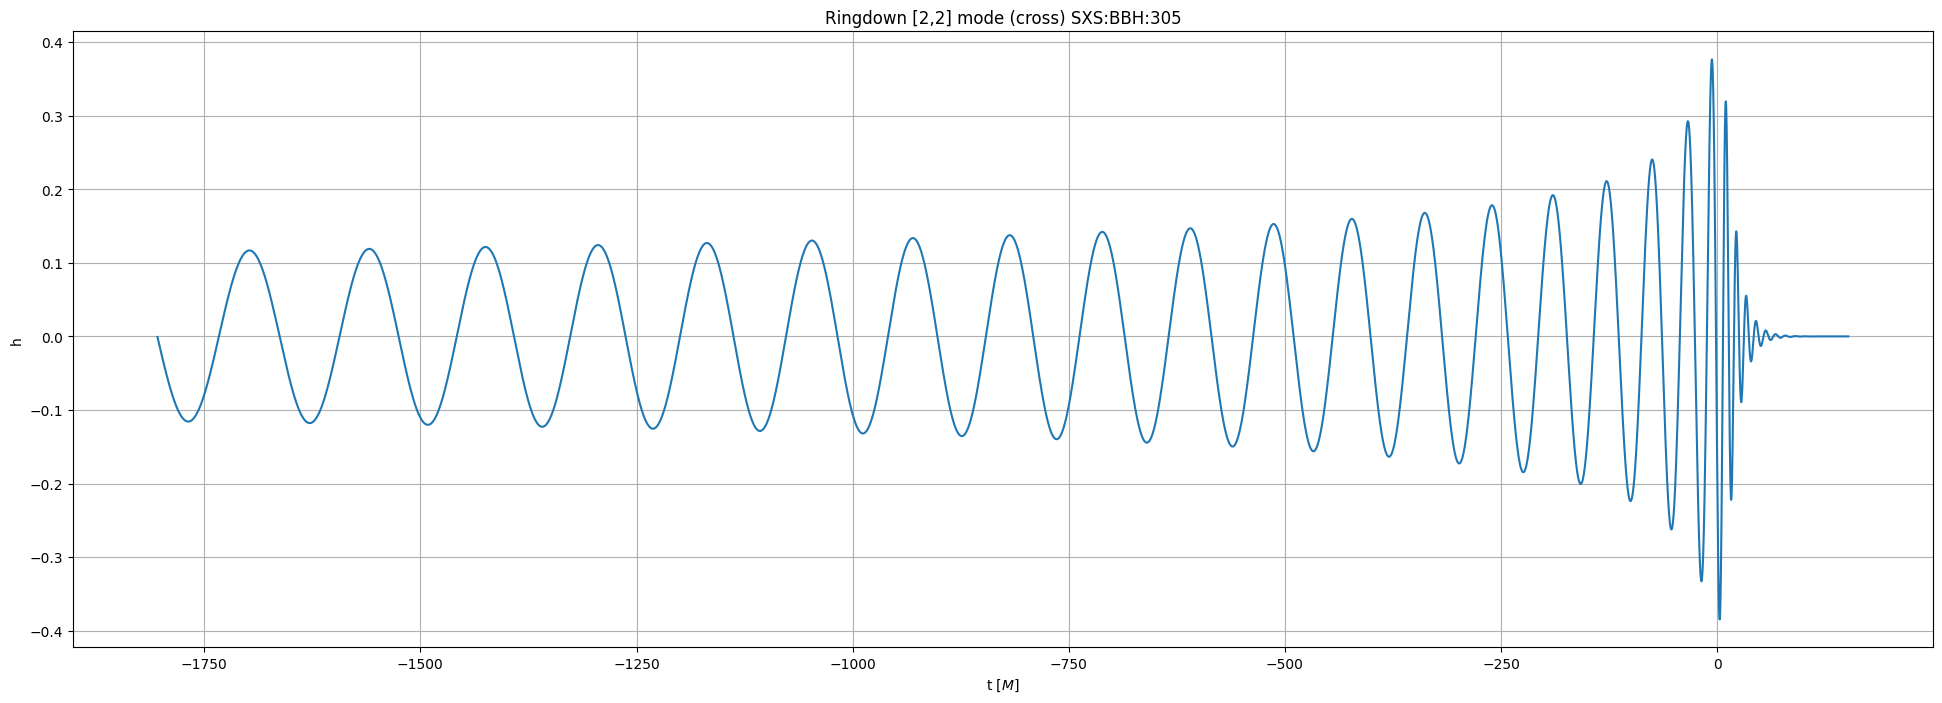

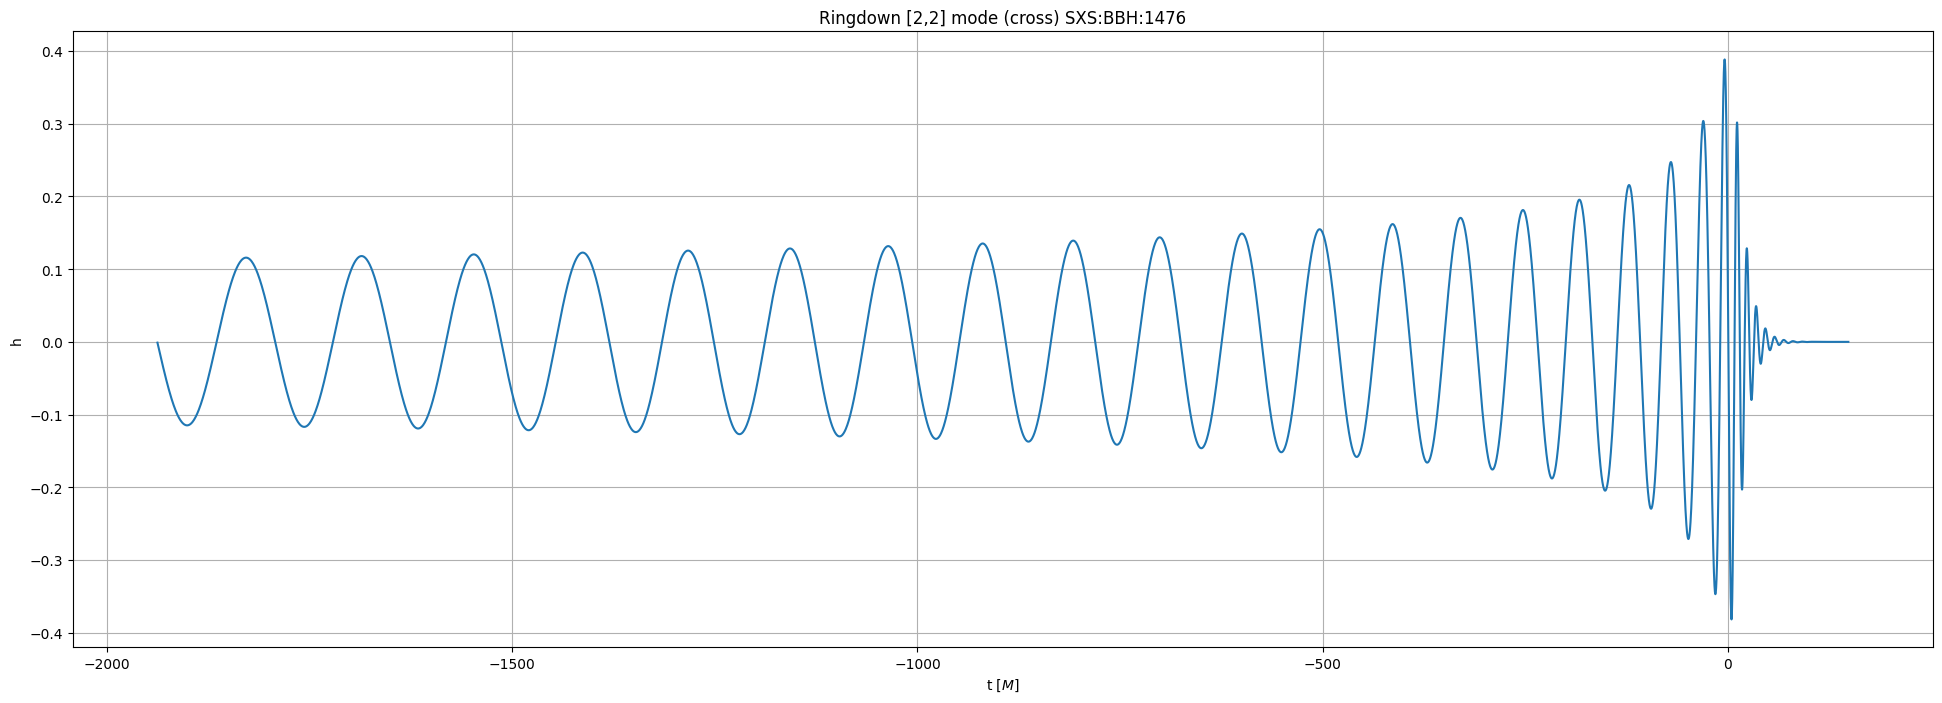

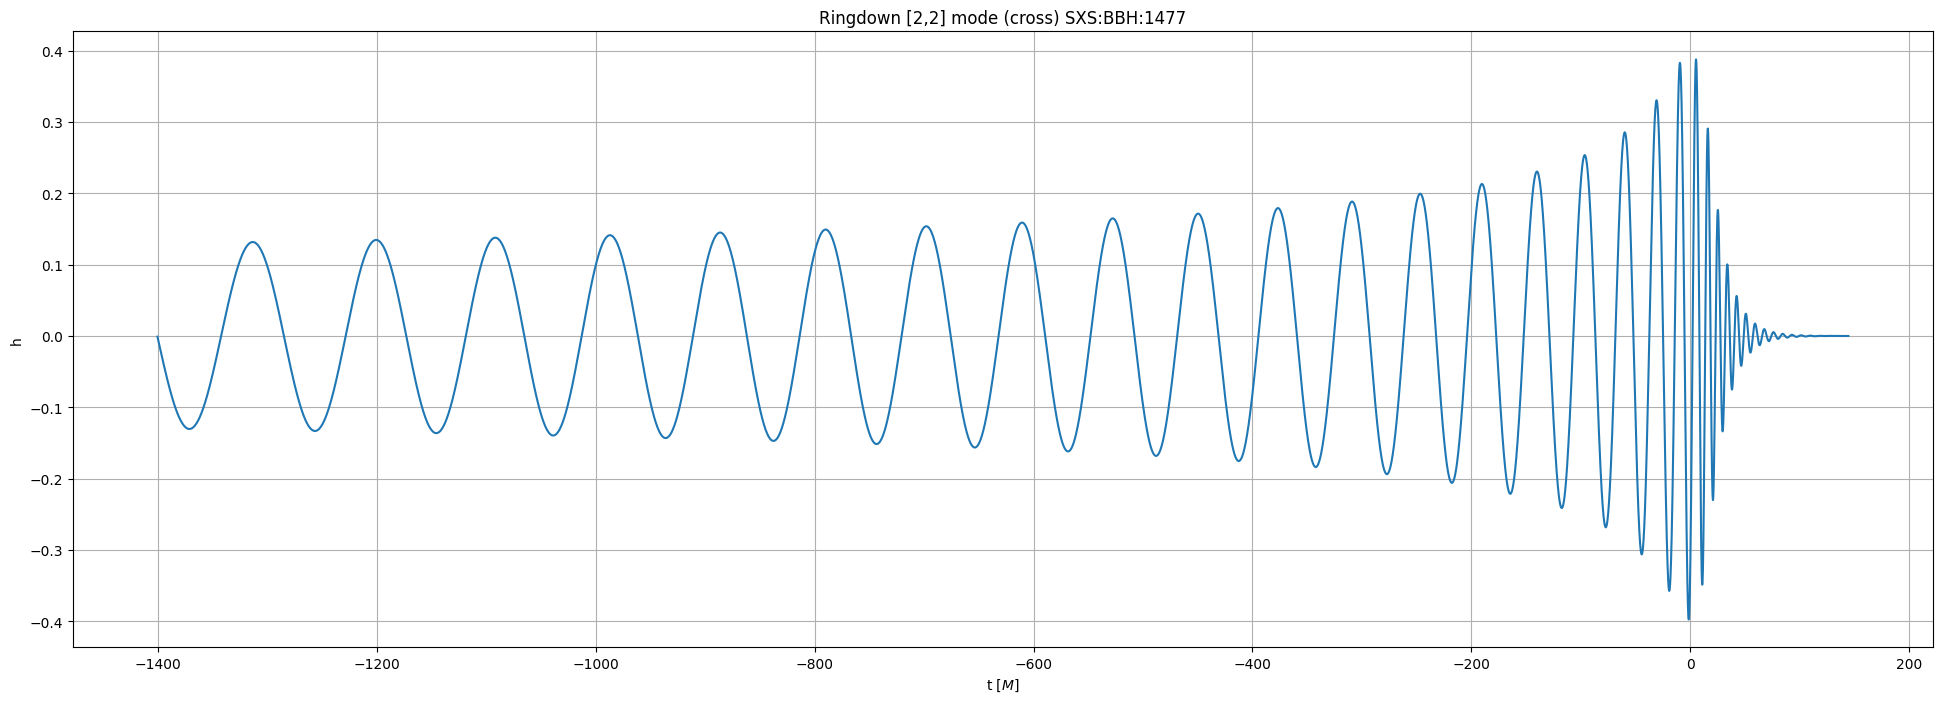

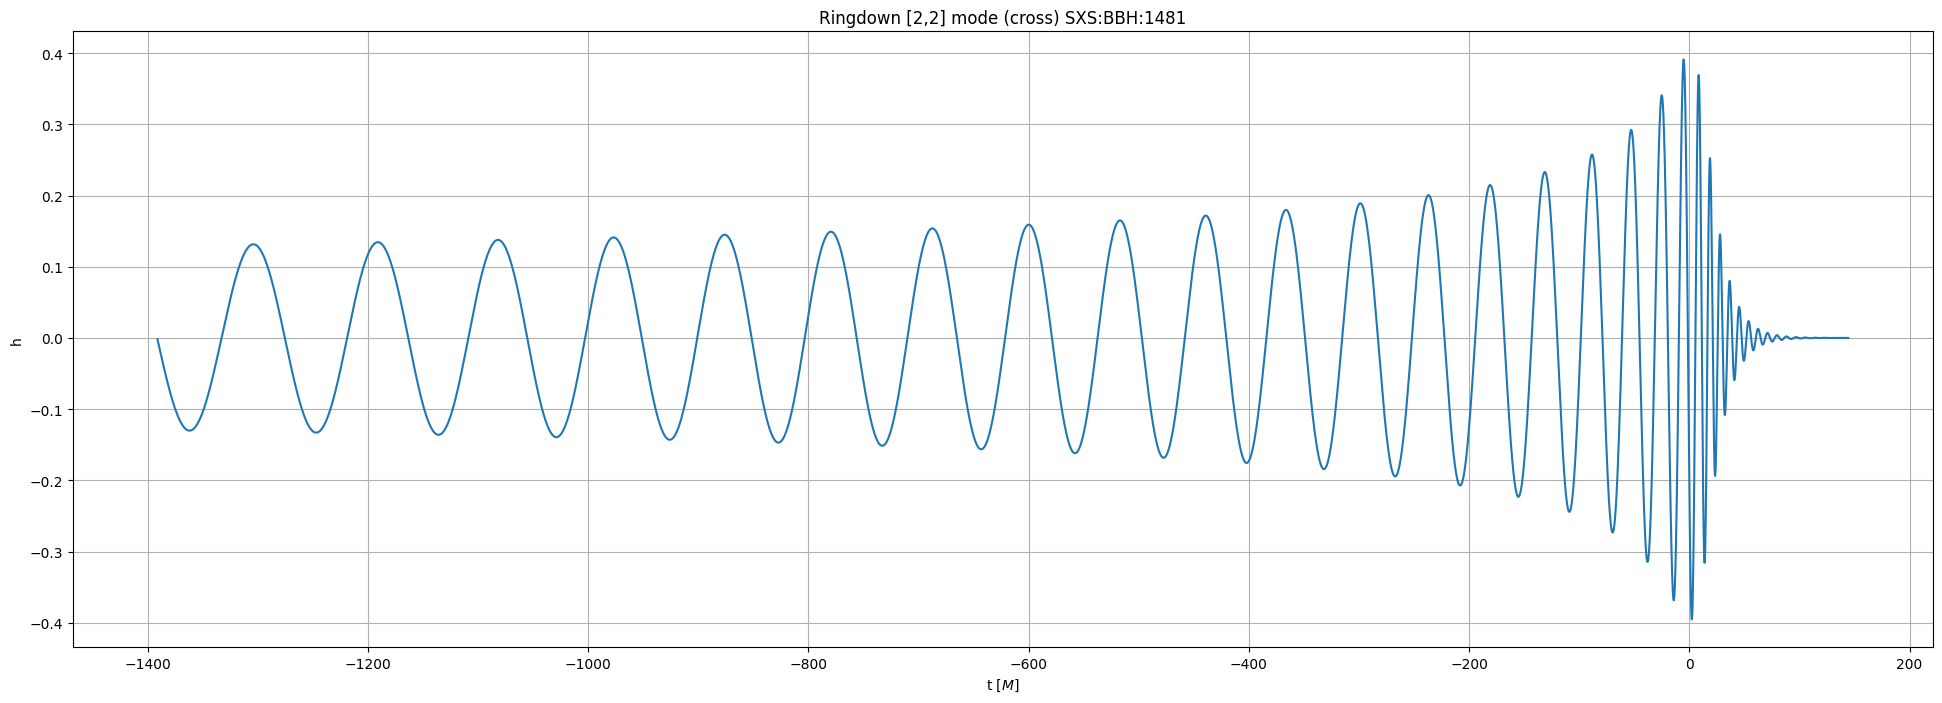

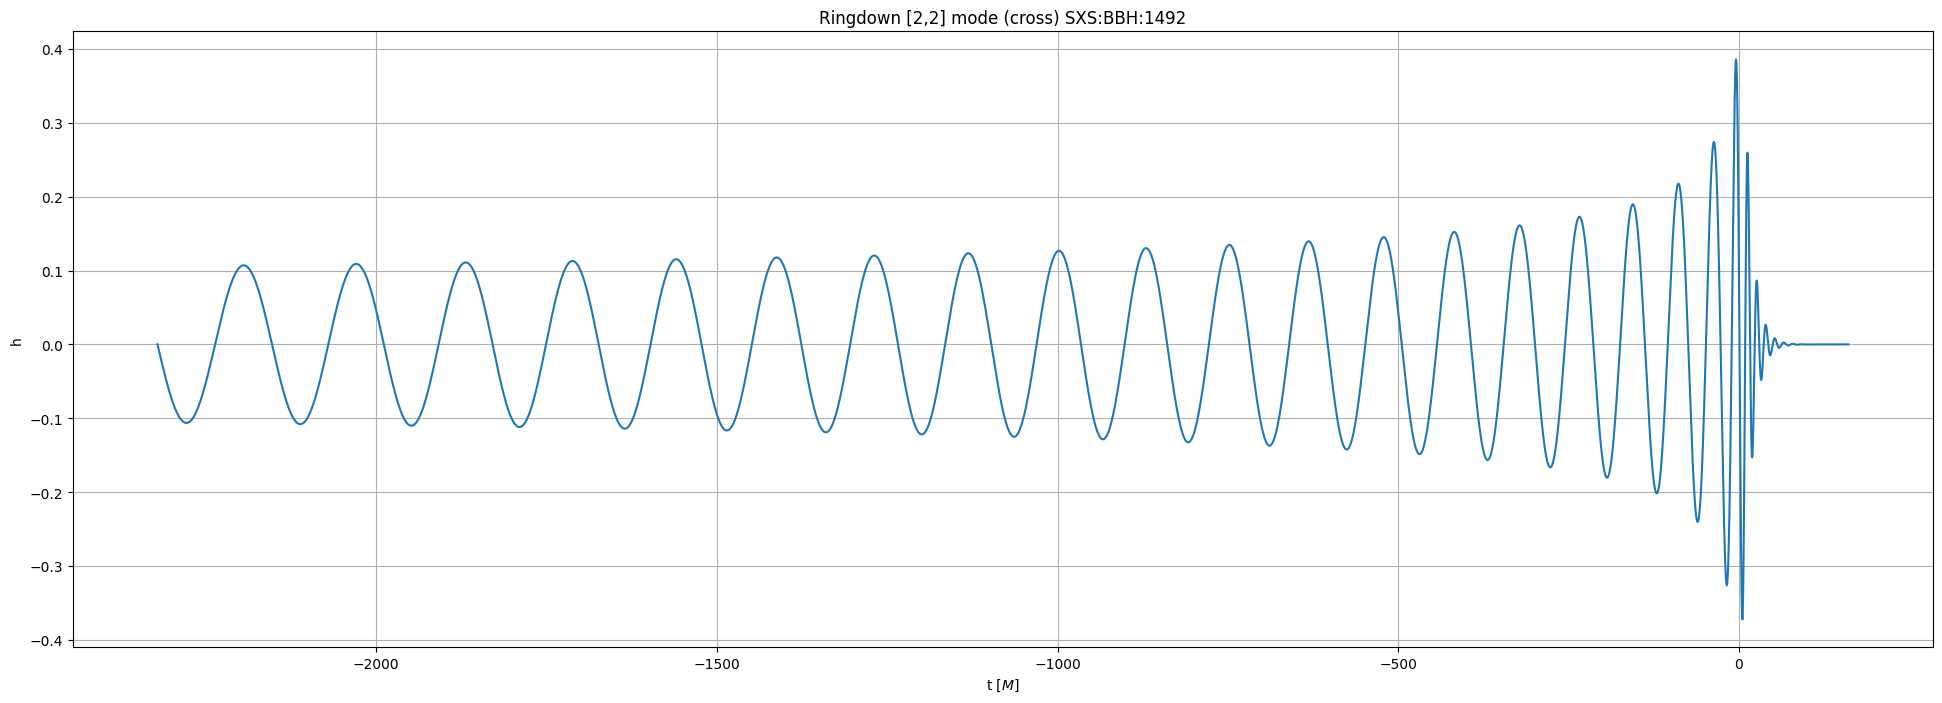

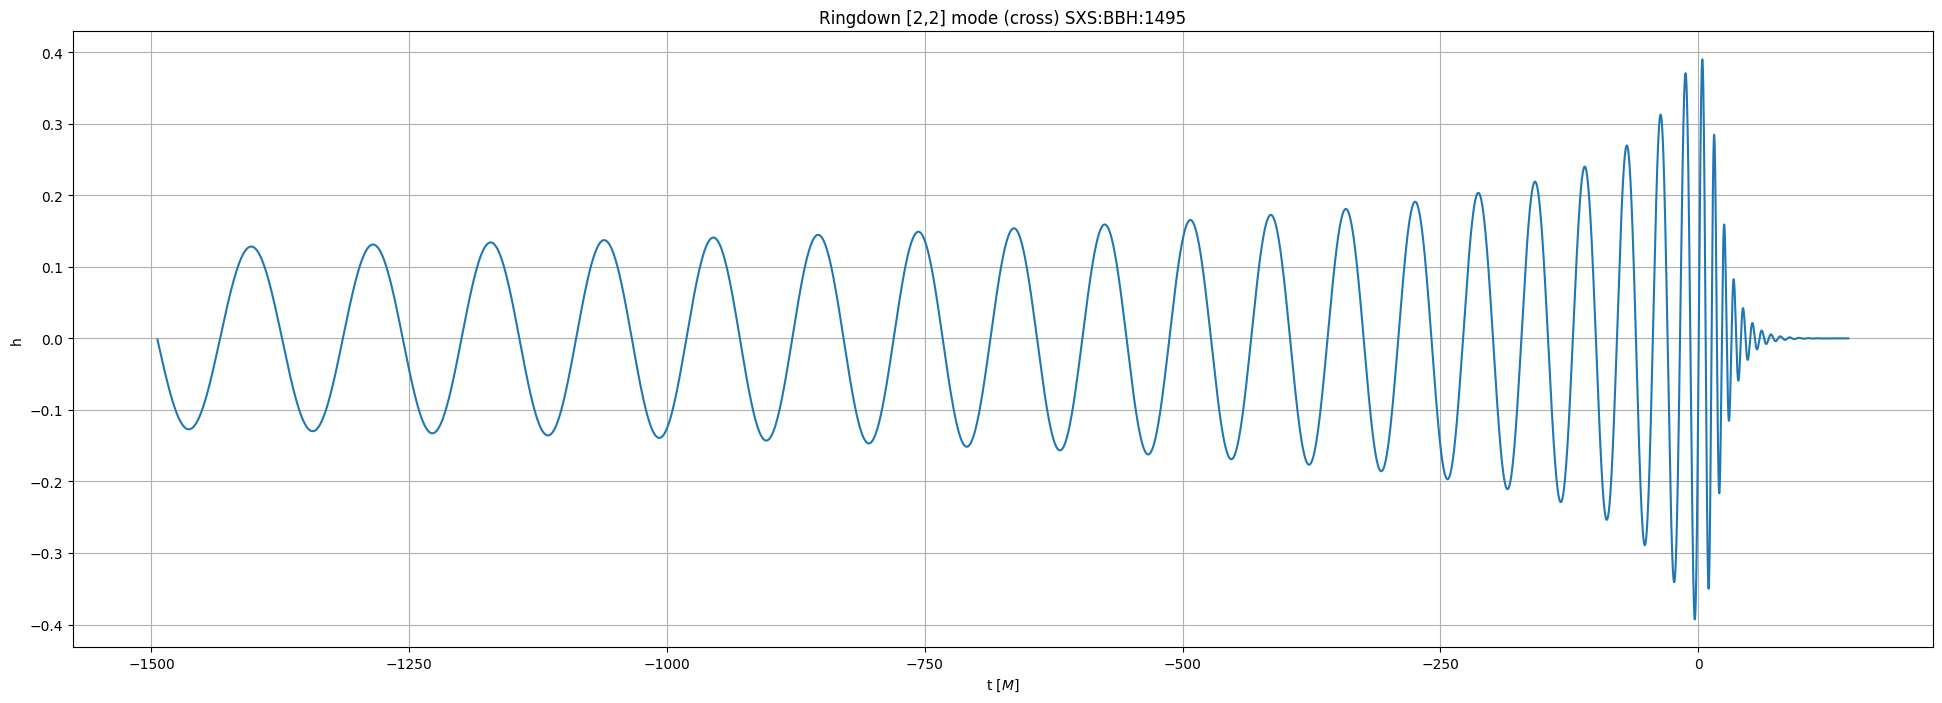

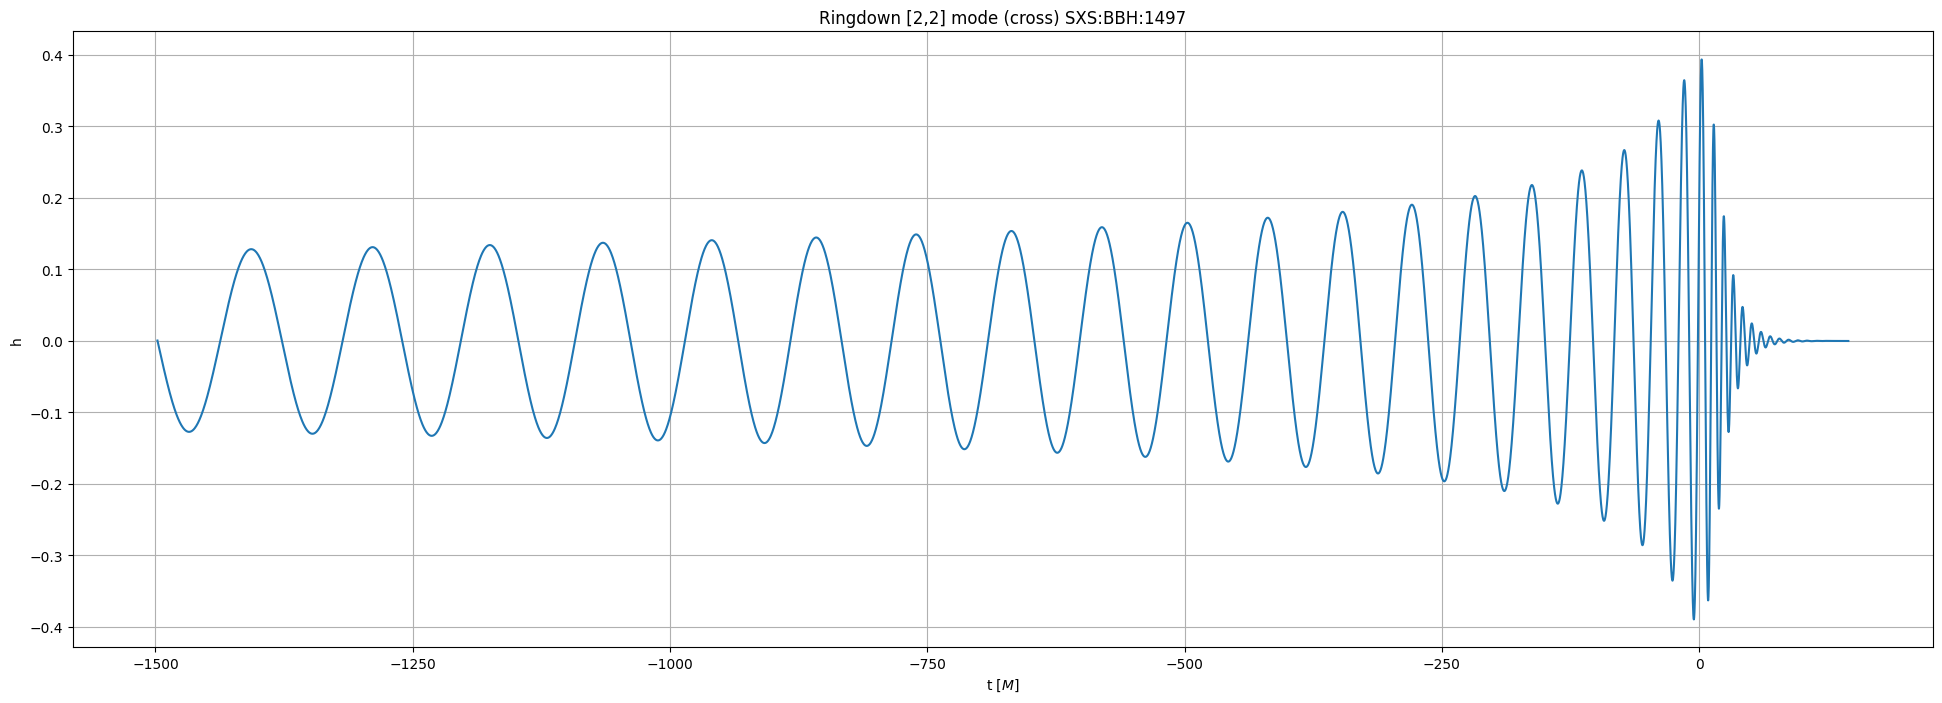

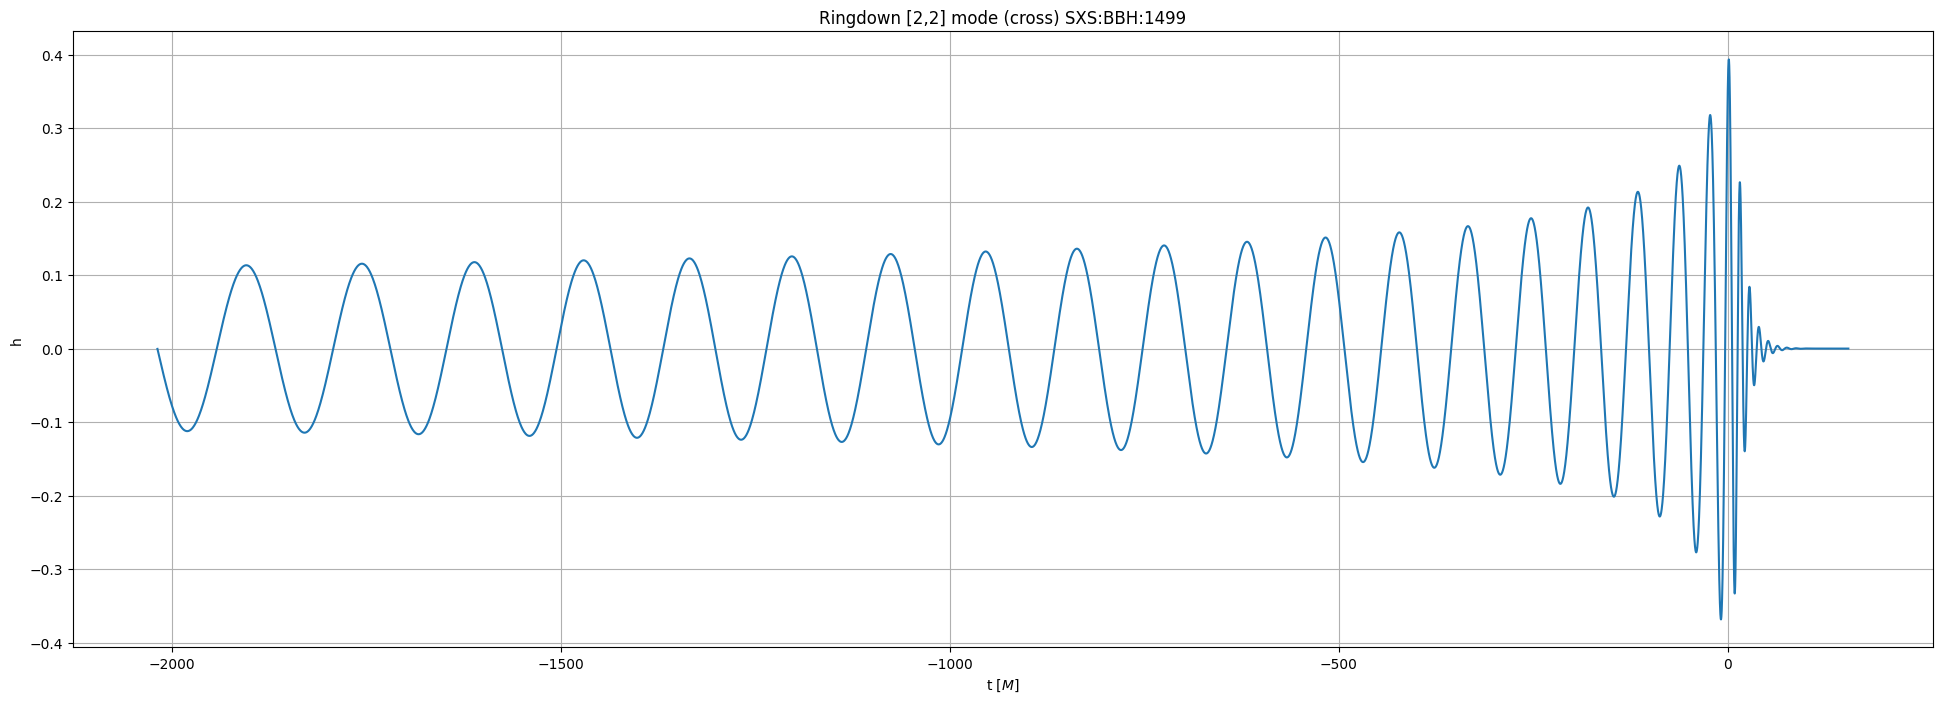

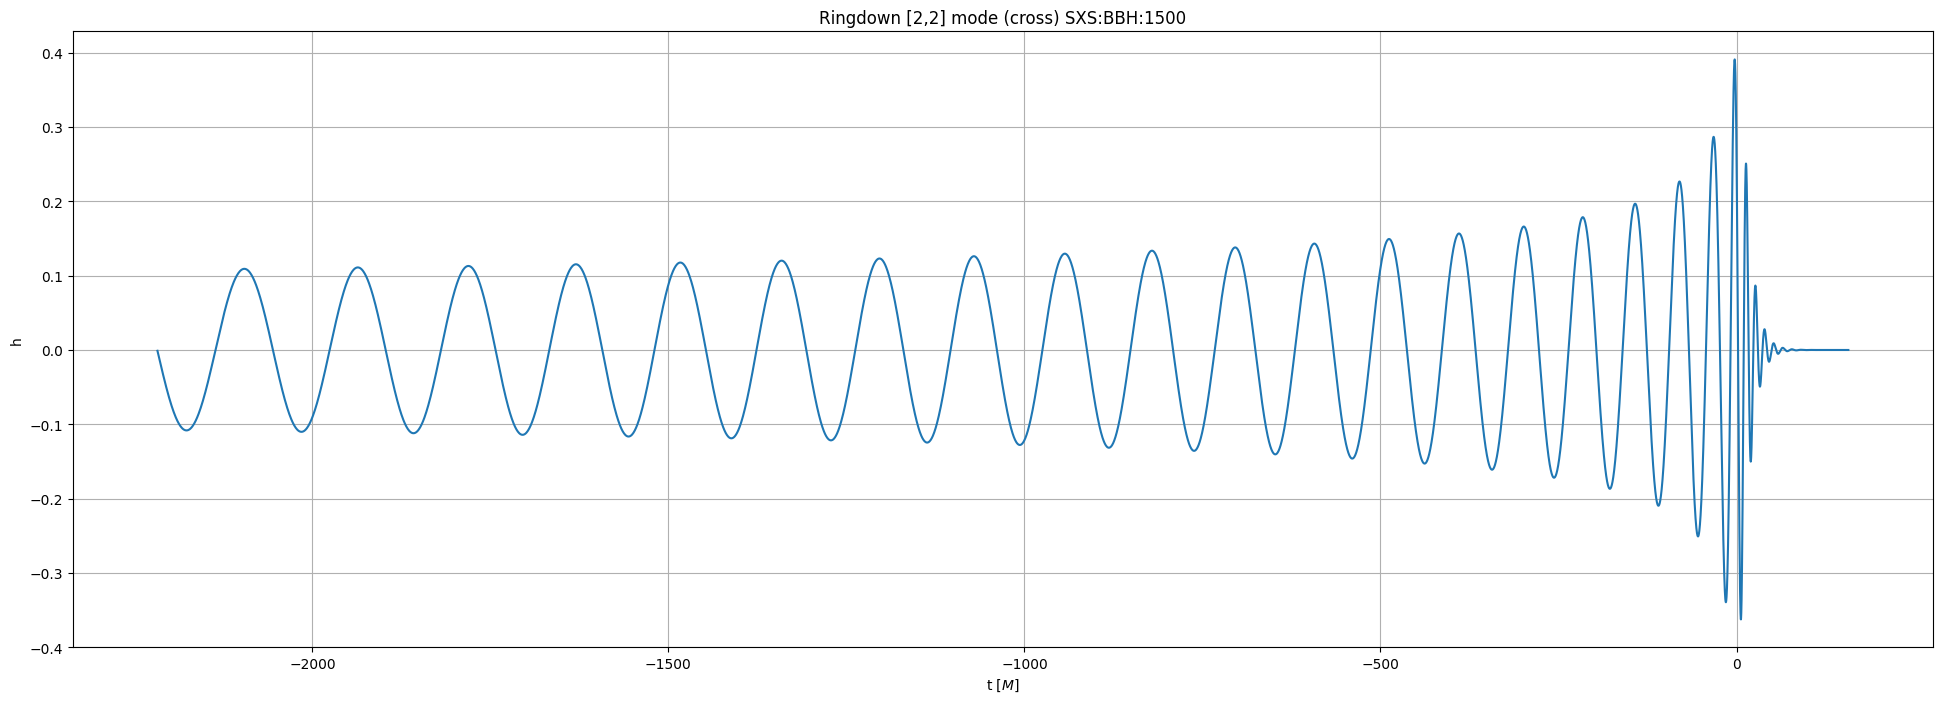

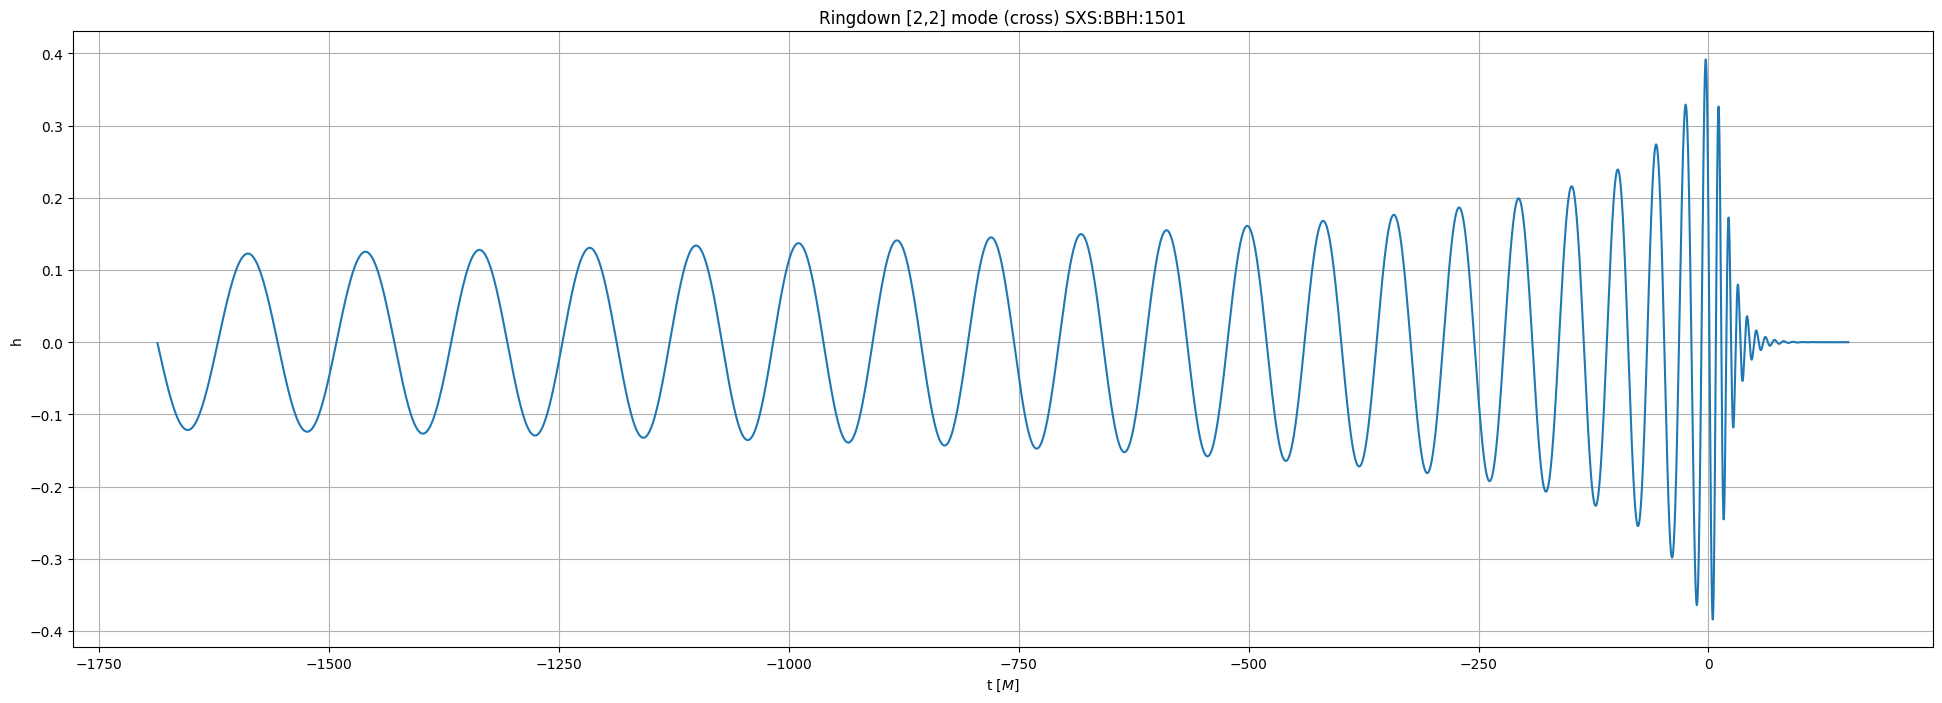

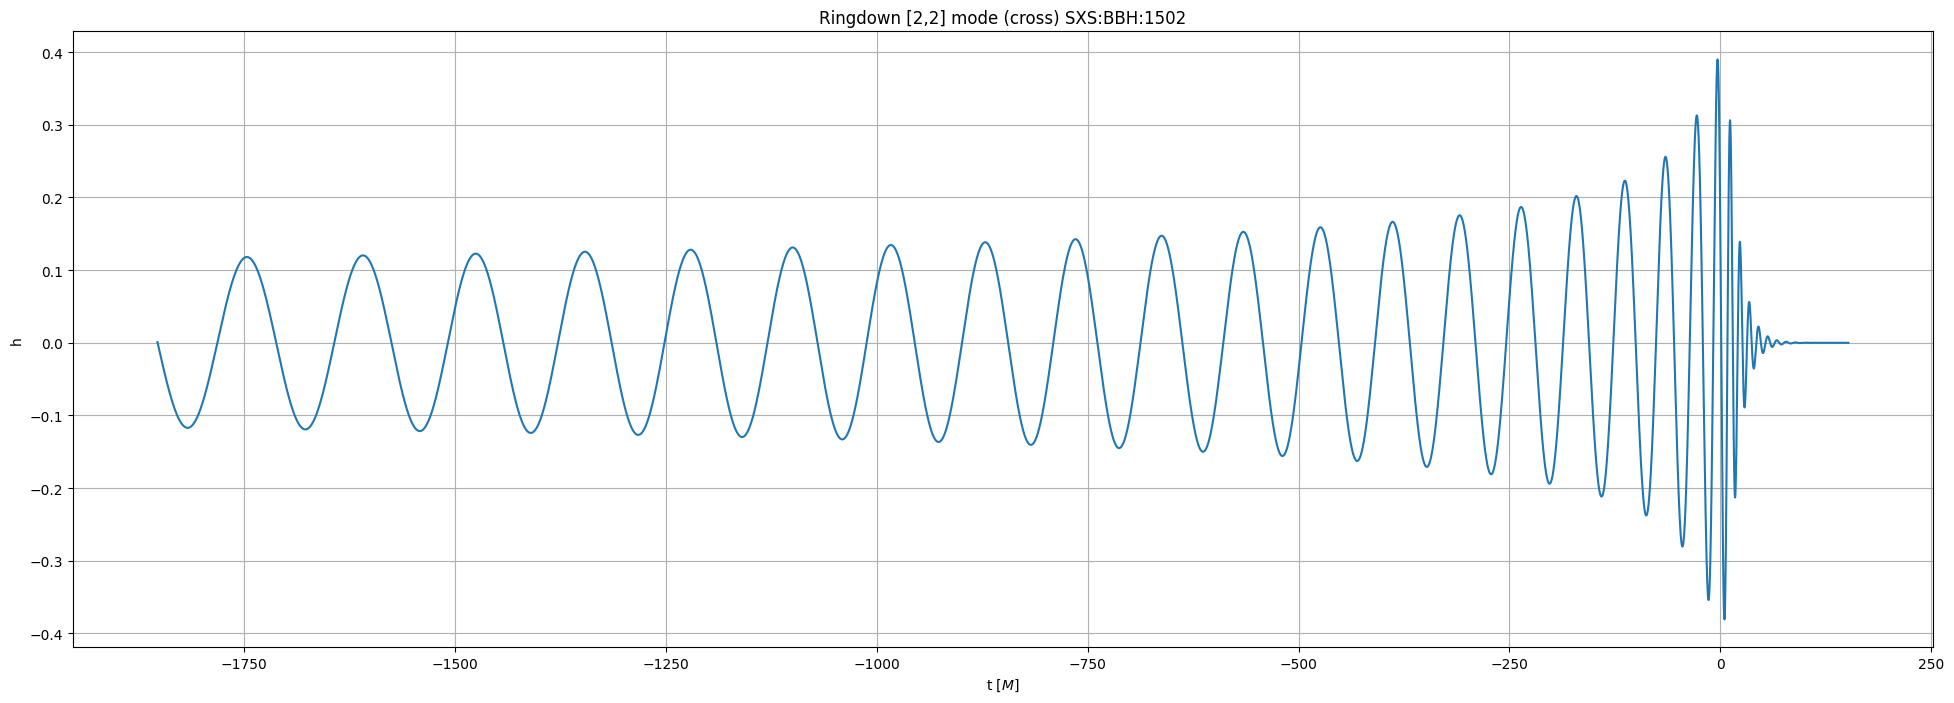

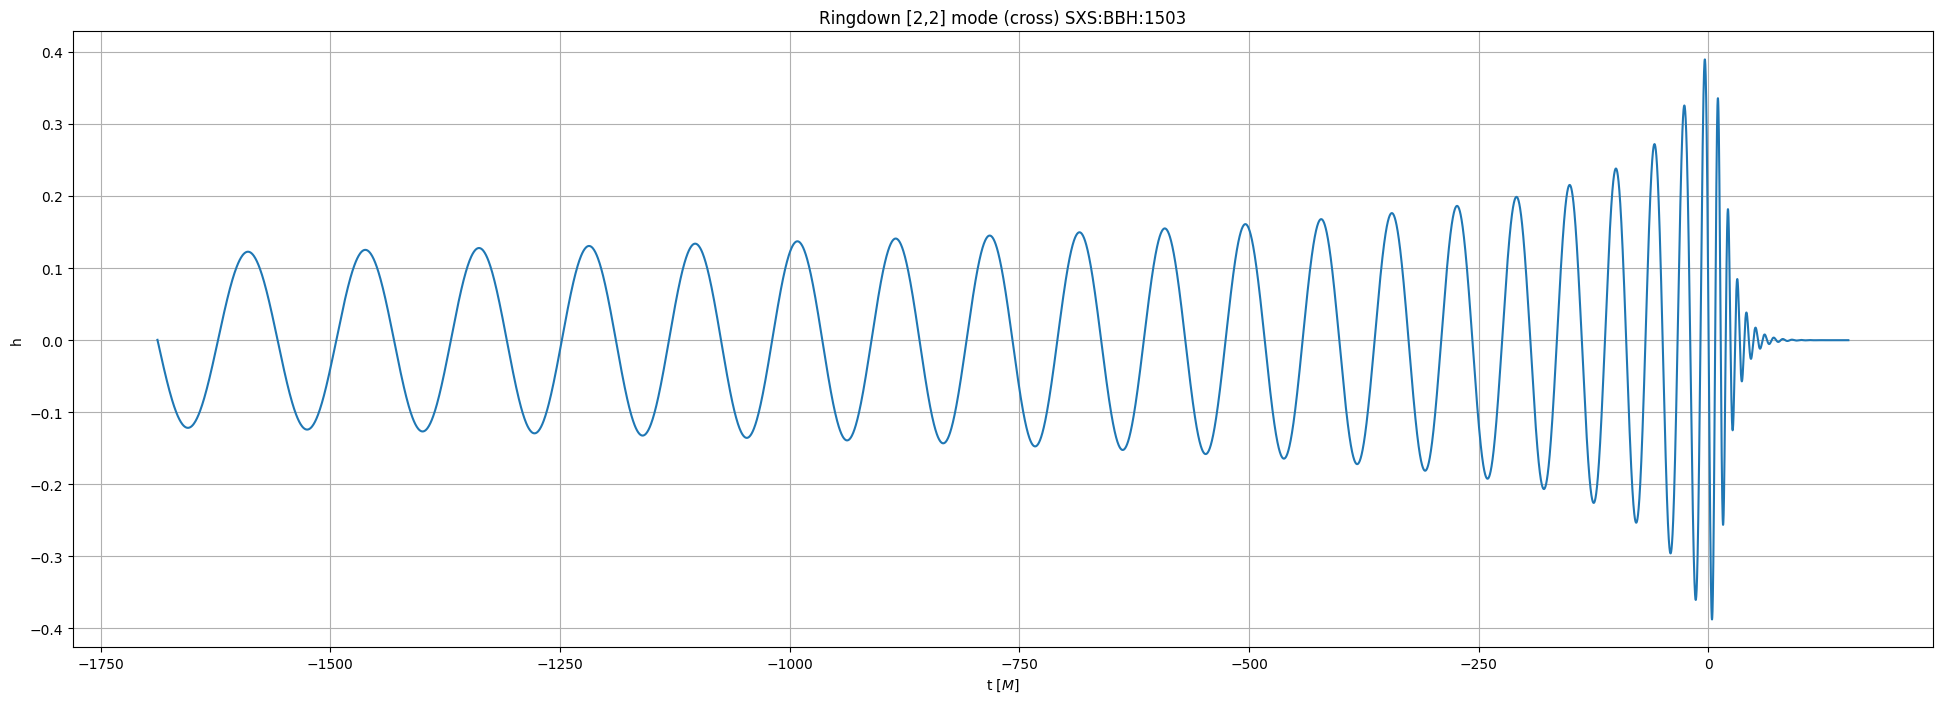

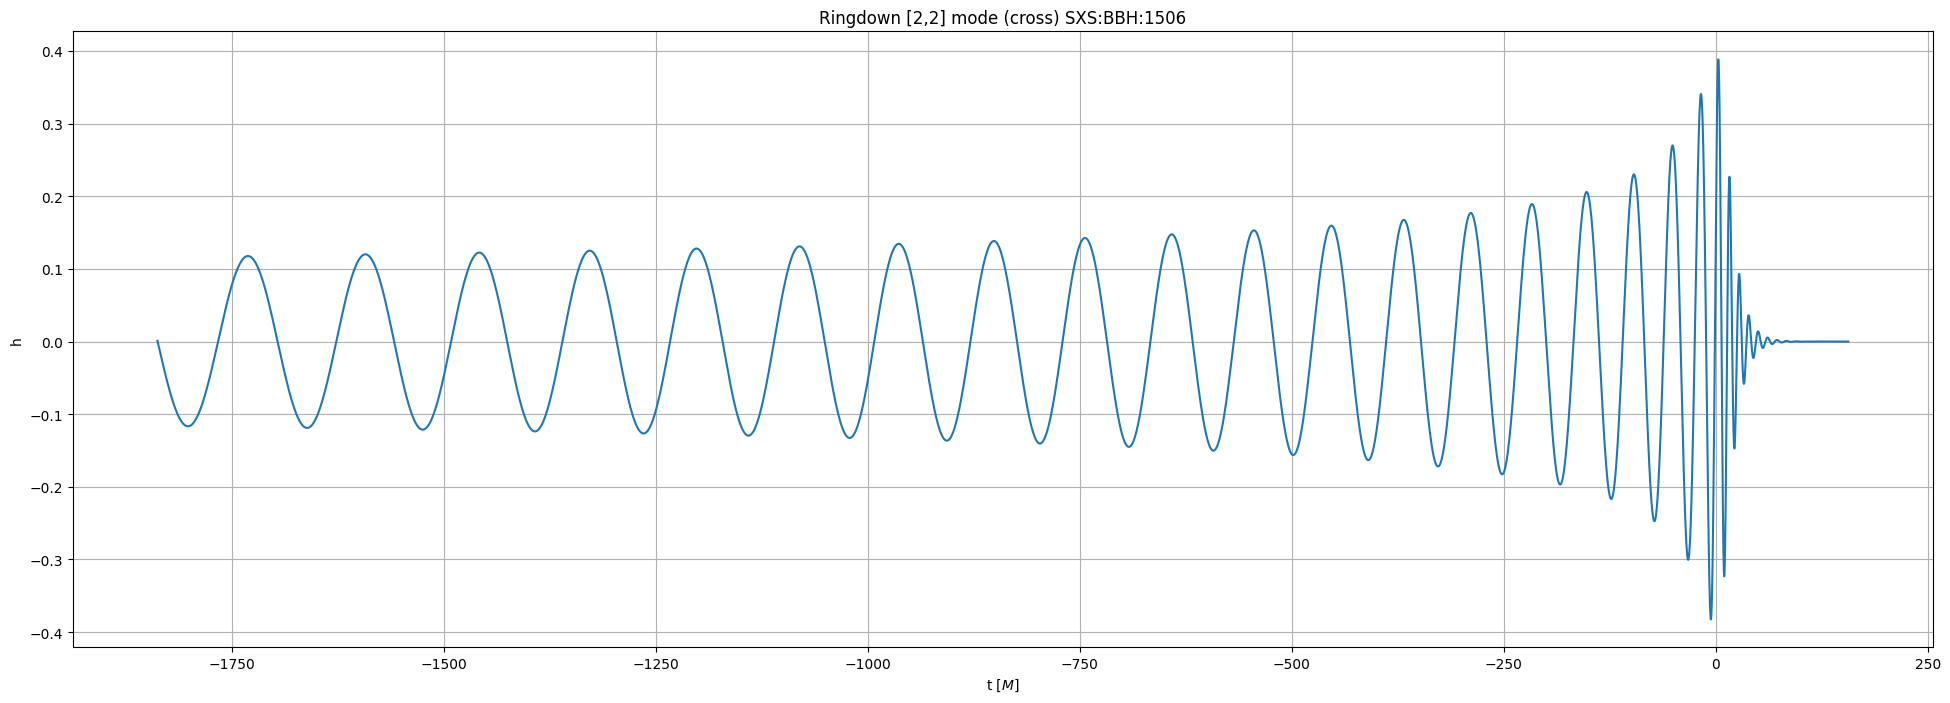

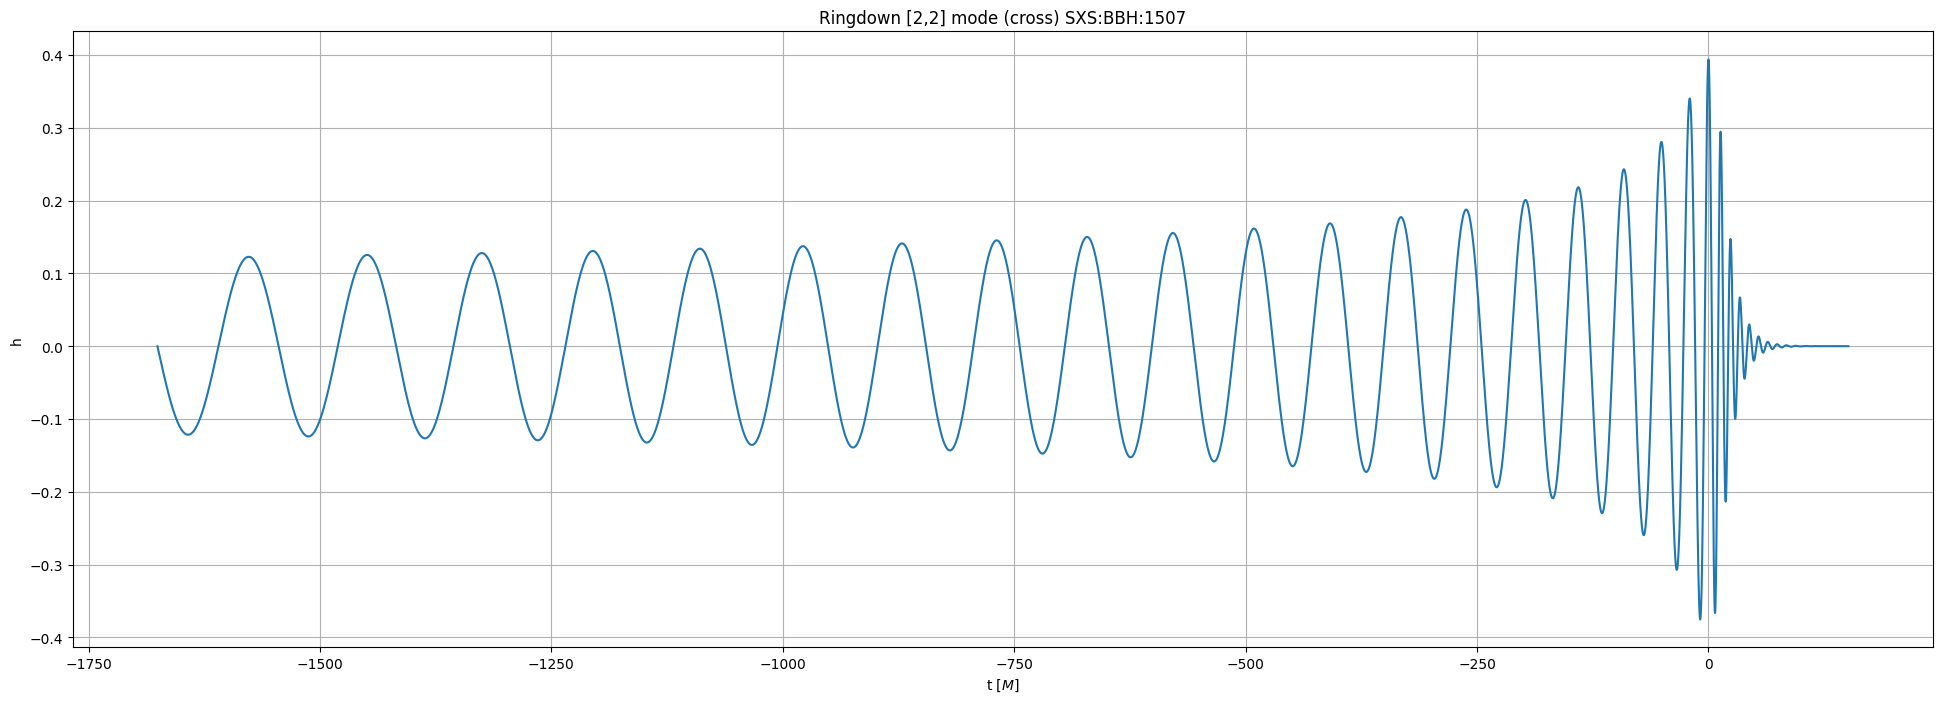

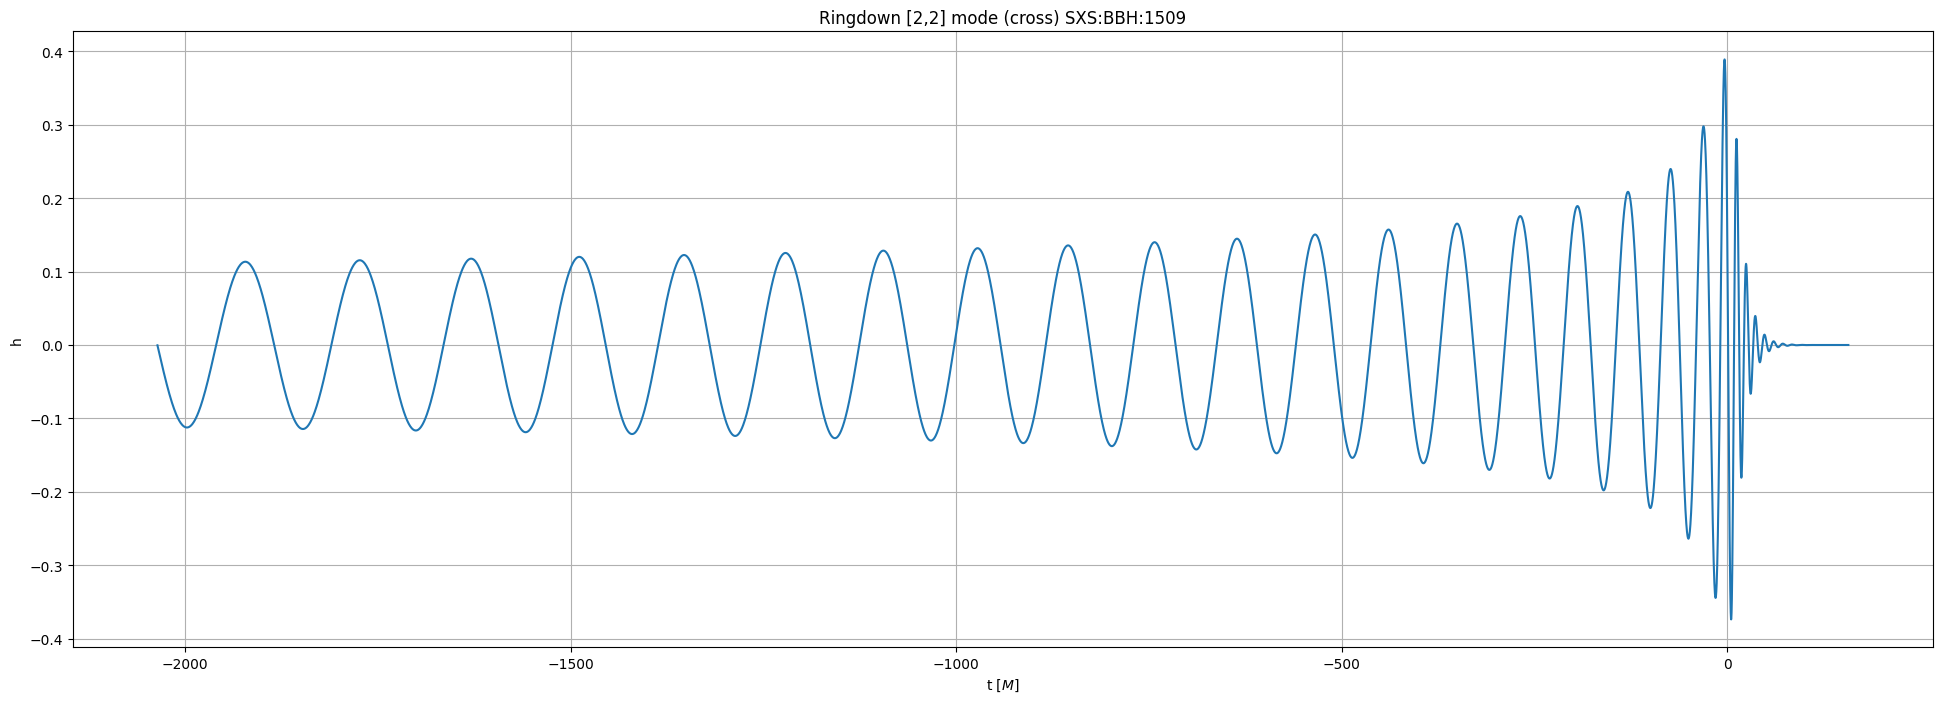

In [50]:
for (sim,ind) in zip(sims,ids):
    fig, ax = plt.subplots(figsize=(24,8))
    ax.plot(sim.times, np.imag(sim.h[2,2]))
    ax.grid(which='both')
    ax.set_title(r'Ringdown [2,2] mode (cross) SXS:BBH:' + str(ind))
    ax.set_xlabel(r't [$M$]')
    ax.set_ylabel('h')
    #ax.set_xlim(0,150)

    #plt.savefig('ringdowncross.png', dpi=500, bbox_inches='tight')

    # Save figure
    if not os.path.exists(ringdown_dir):
        os.makedirs(ringdown_dir)
    plt.savefig(ringdown_dir + 'ringdowncross' + str(ind) + '.png', dpi=500, bbox_inches='tight')
    print('Saved ringdowncross' + str(ind) + '.png')

Peak is at [0.0, 0.38950754530171744]
Saved ringdownpeak305.png
Peak is at [0.0, 0.394837561366854]
Saved ringdownpeak1476.png
Peak is at [0.0, 0.39765393801837307]
Saved ringdownpeak1477.png
Peak is at [0.0, 0.39700179278651115]
Saved ringdownpeak1481.png
Peak is at [0.0, 0.395154093952301]
Saved ringdownpeak1492.png
Peak is at [0.0, 0.39573466790101874]
Saved ringdownpeak1495.png
Peak is at [0.0, 0.39580279300693044]
Saved ringdownpeak1497.png
Peak is at [0.0, 0.3942177856855081]
Saved ringdownpeak1499.png
Peak is at [0.0, 0.3946690037334334]
Saved ringdownpeak1500.png
Peak is at [0.0, 0.3945428463348804]
Saved ringdownpeak1501.png
Peak is at [0.0, 0.39436615744075987]
Saved ringdownpeak1502.png
Peak is at [0.0, 0.39447438780092725]
Saved ringdownpeak1503.png
Peak is at [0.0, 0.39386720811496834]
Saved ringdownpeak1506.png
Peak is at [0.0, 0.3939099922570274]
Saved ringdownpeak1507.png
Peak is at [0.0, 0.3938347471444933]
Saved ringdownpeak1509.png


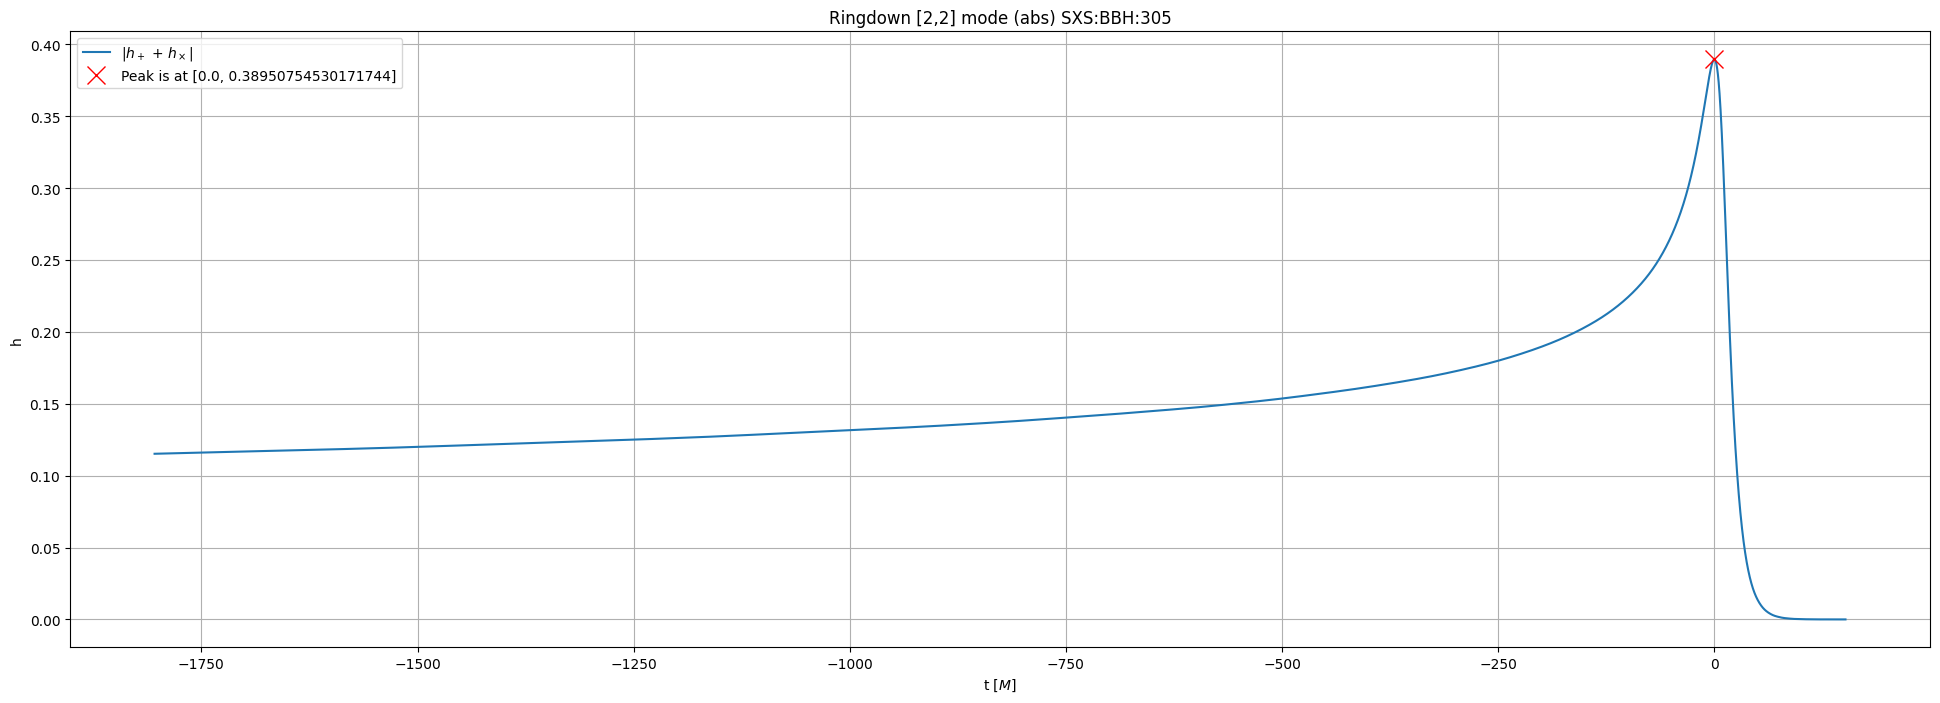

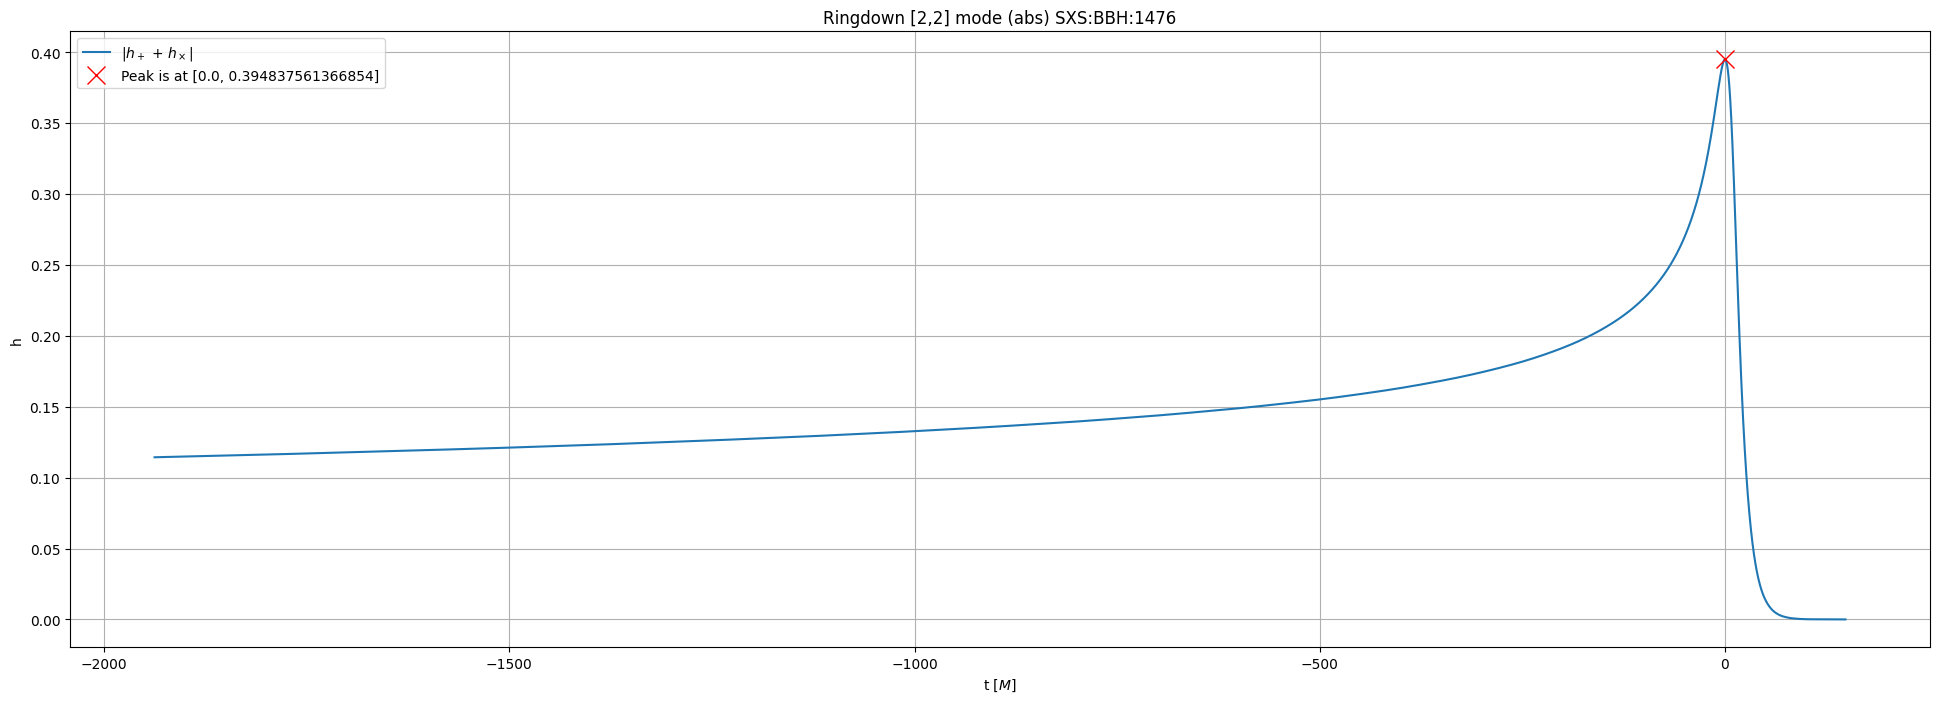

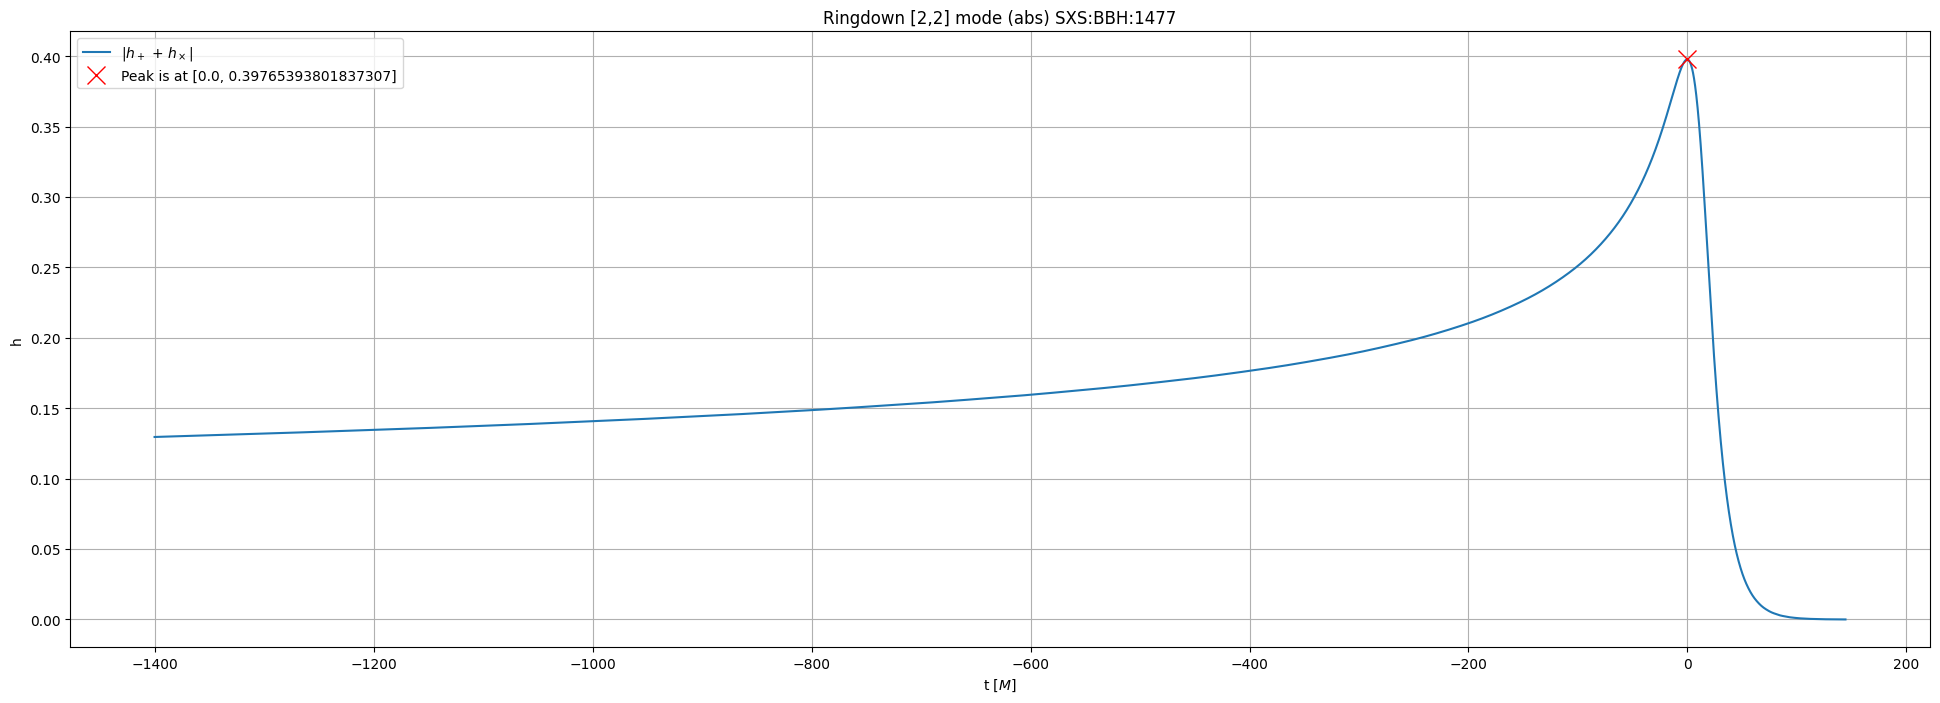

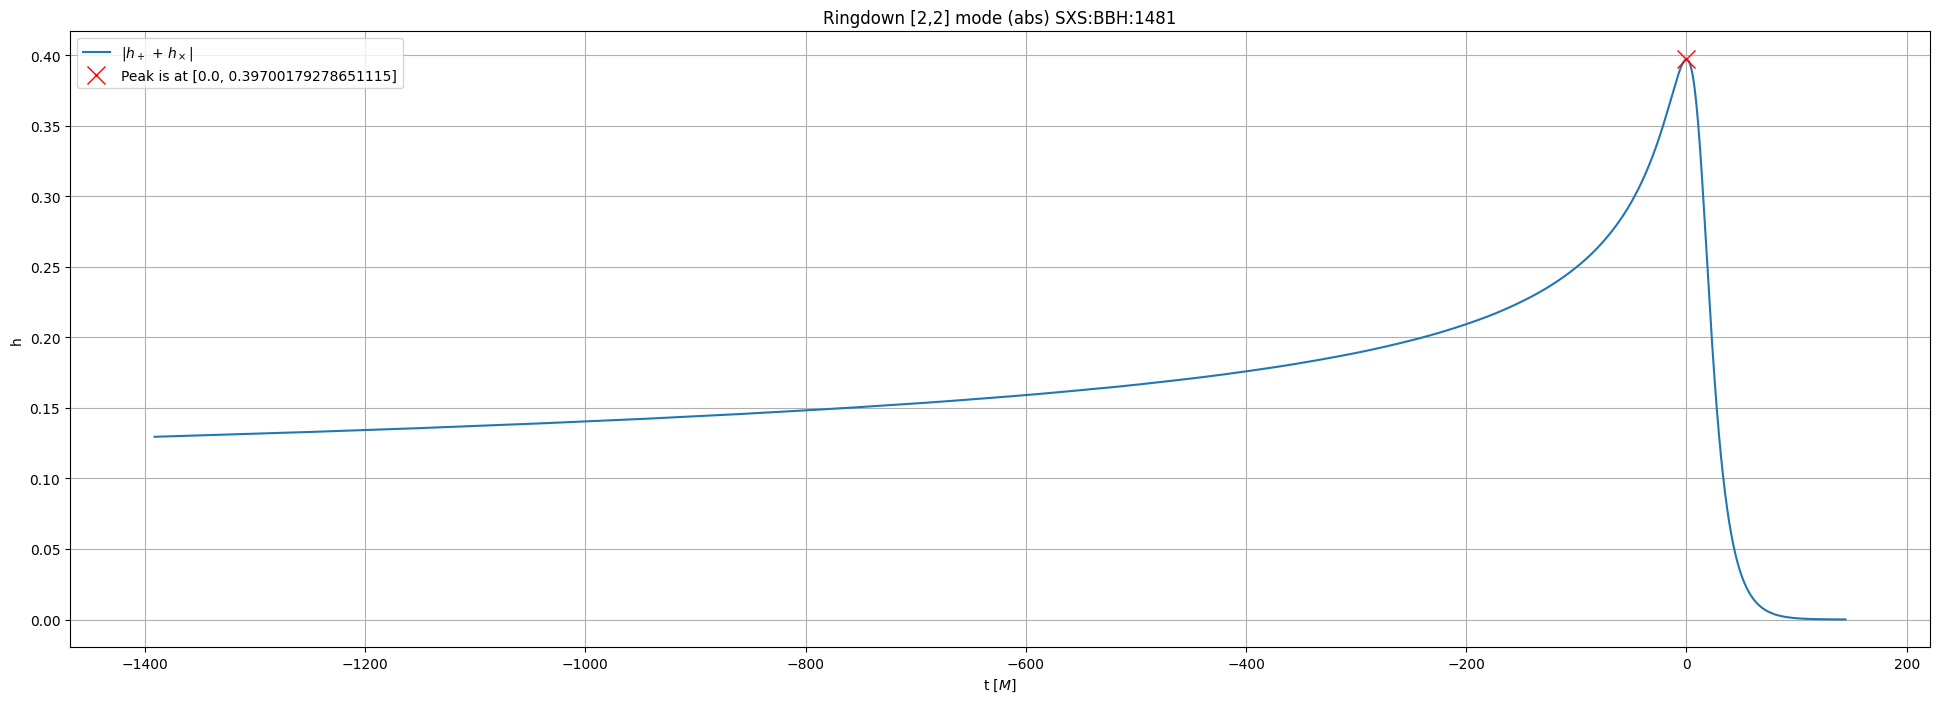

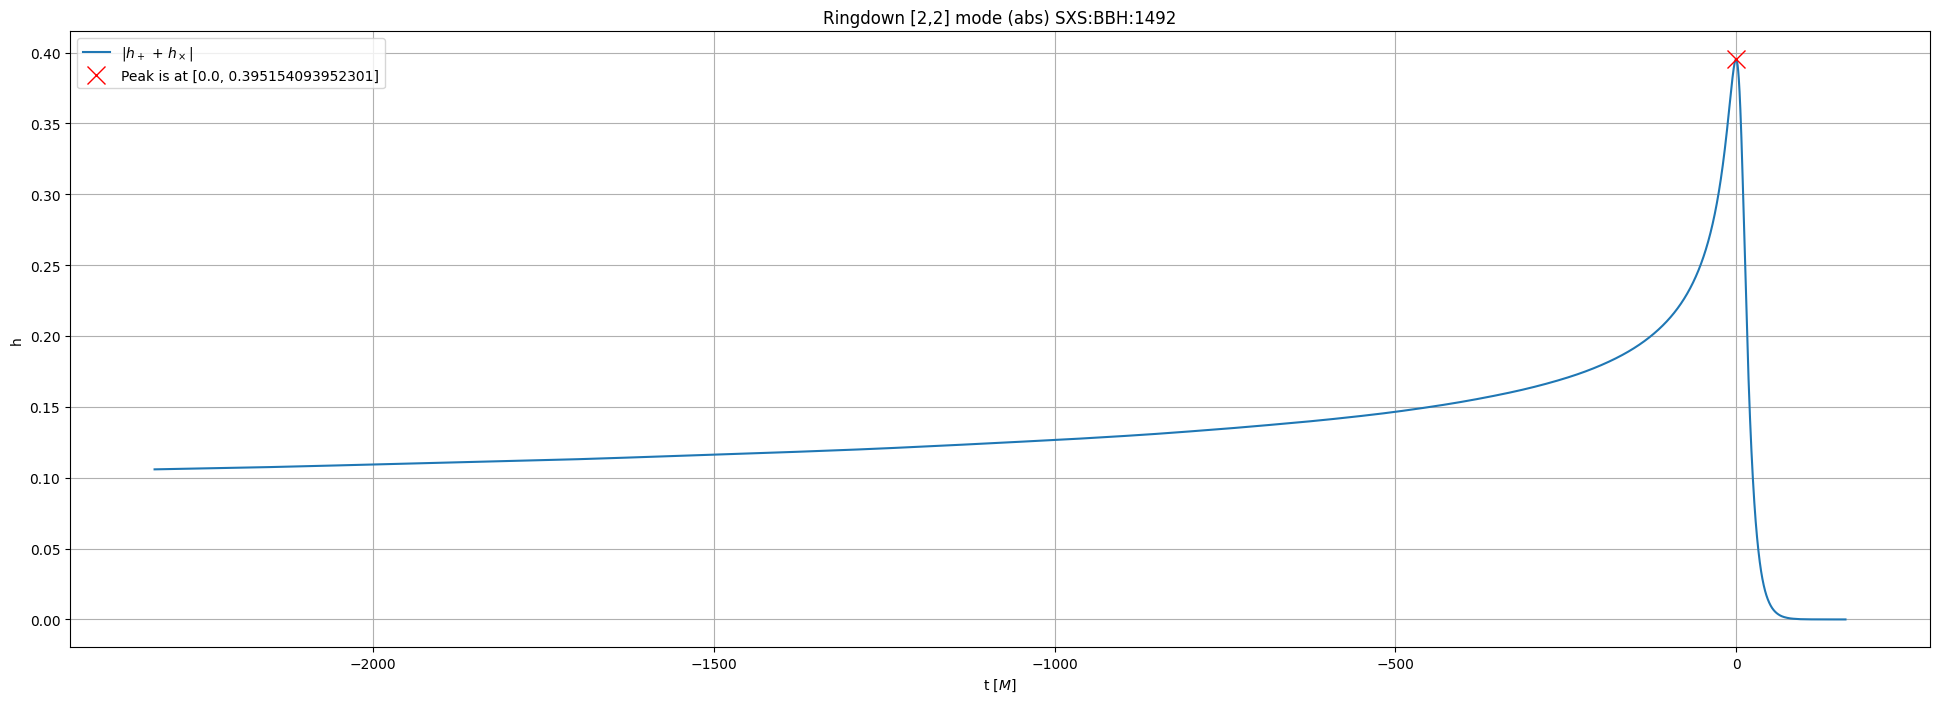

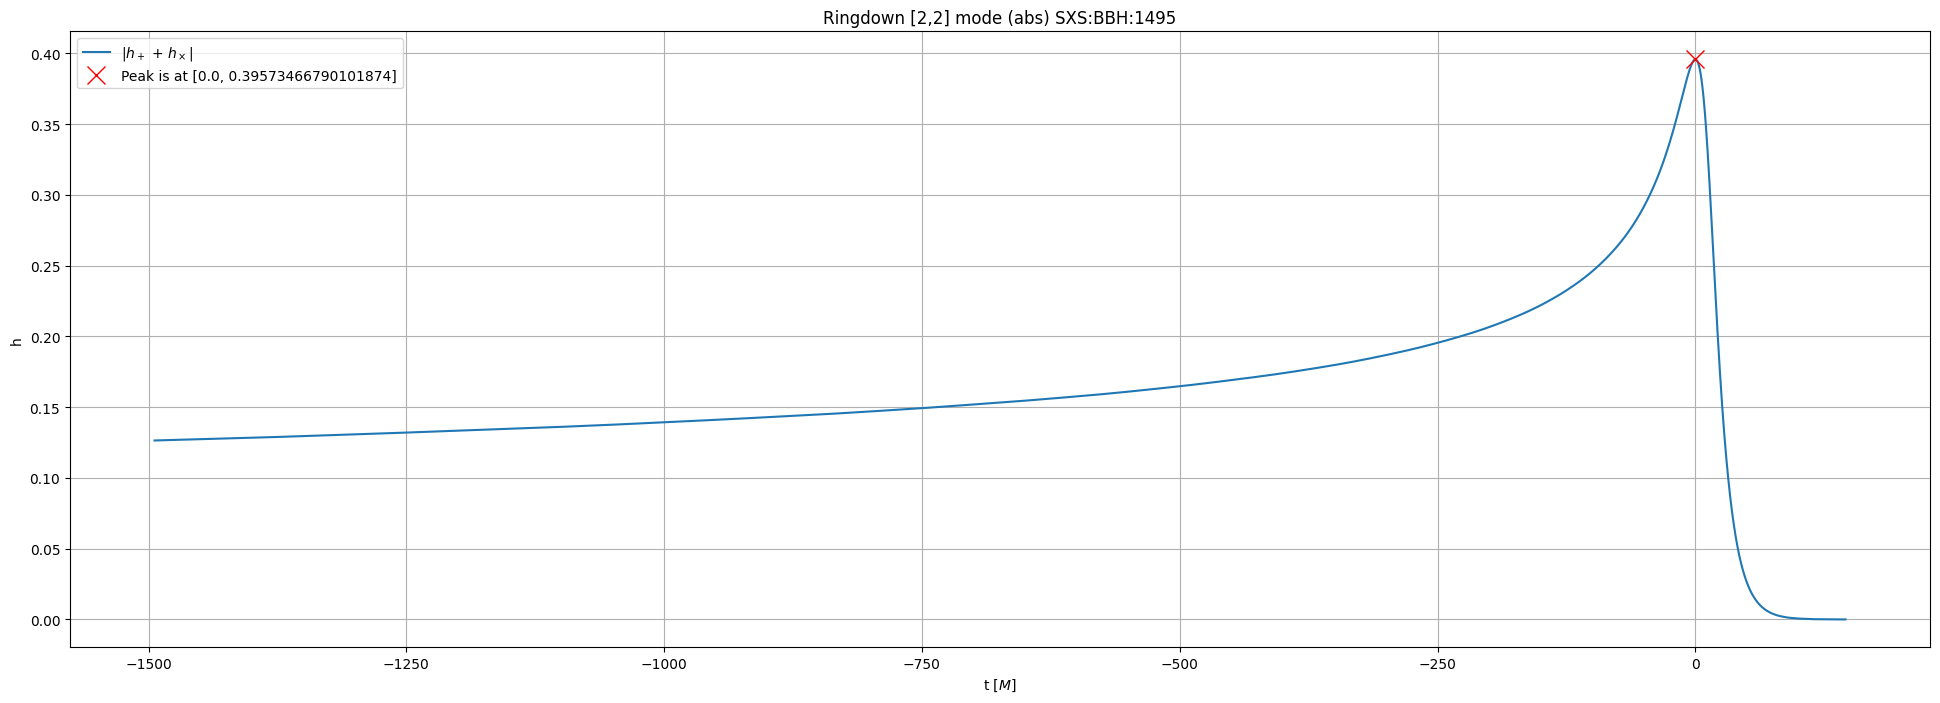

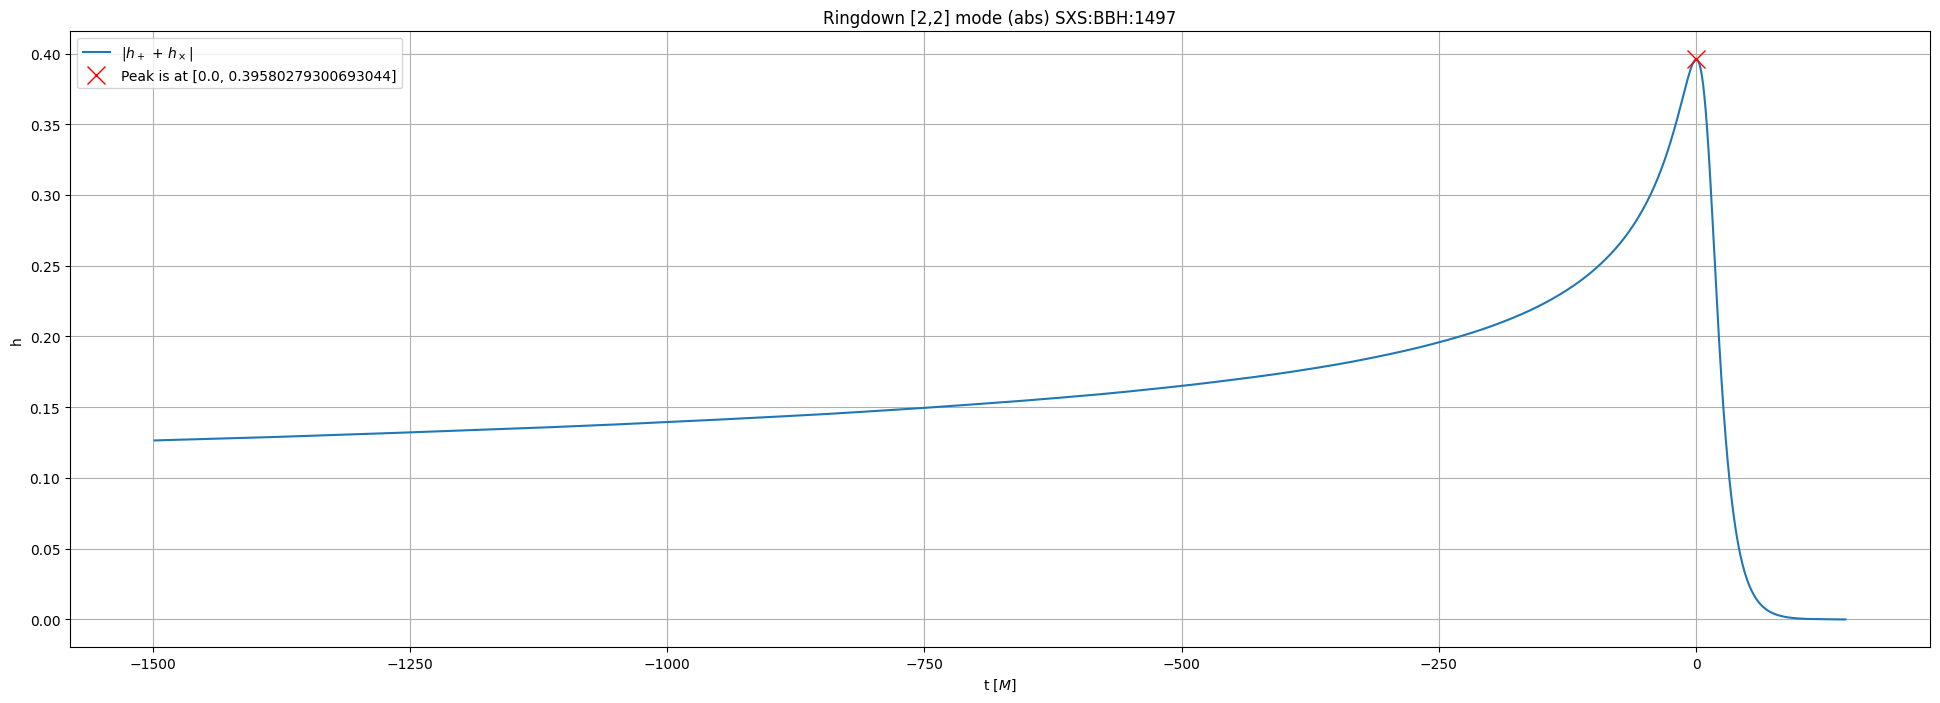

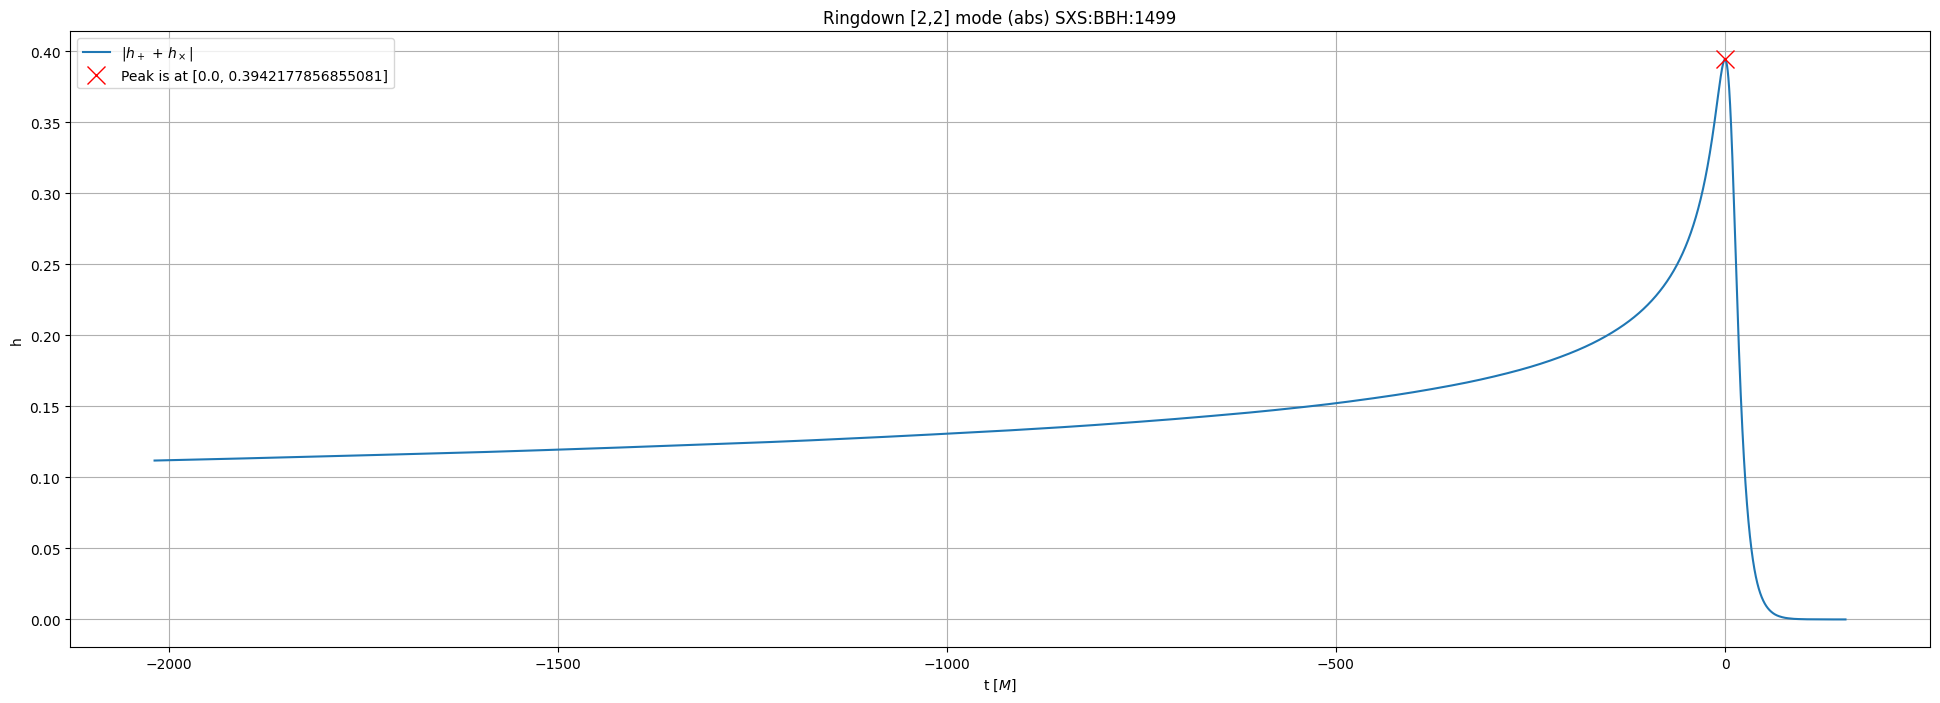

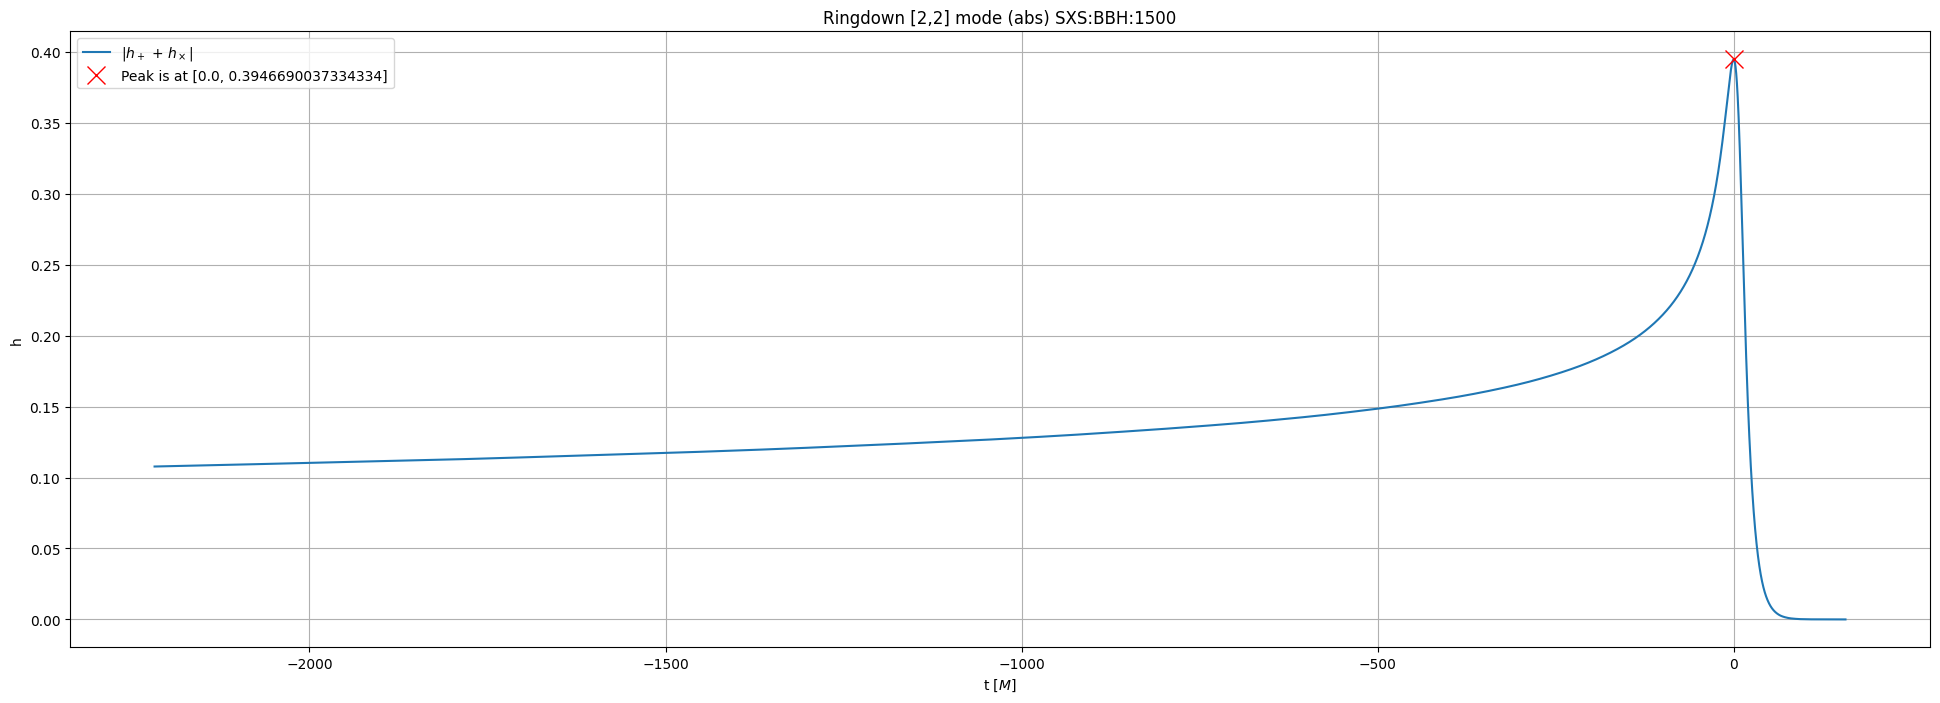

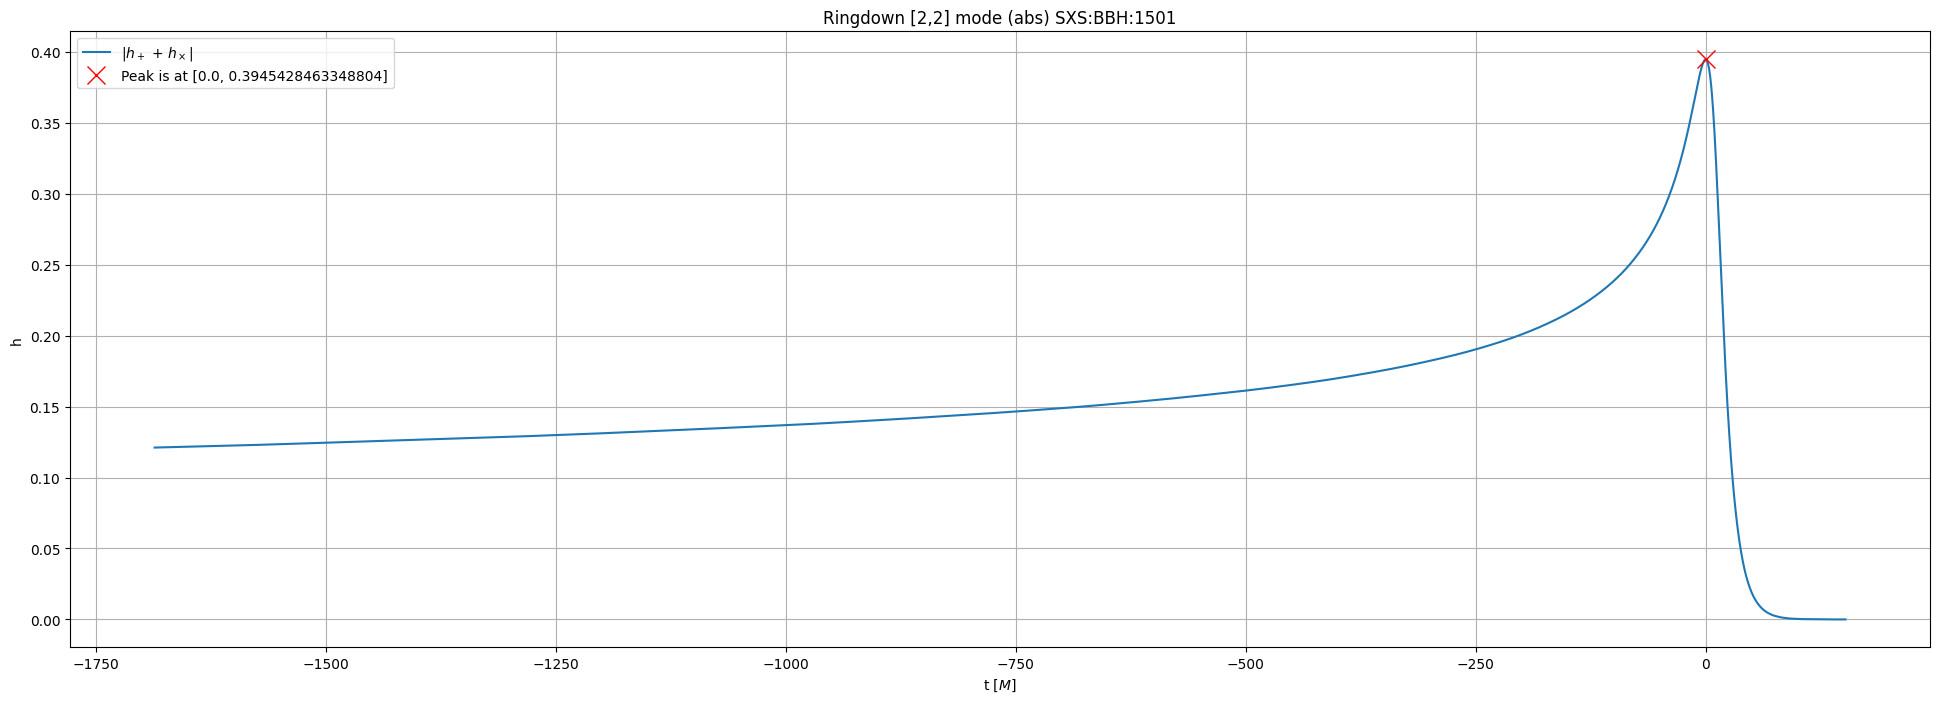

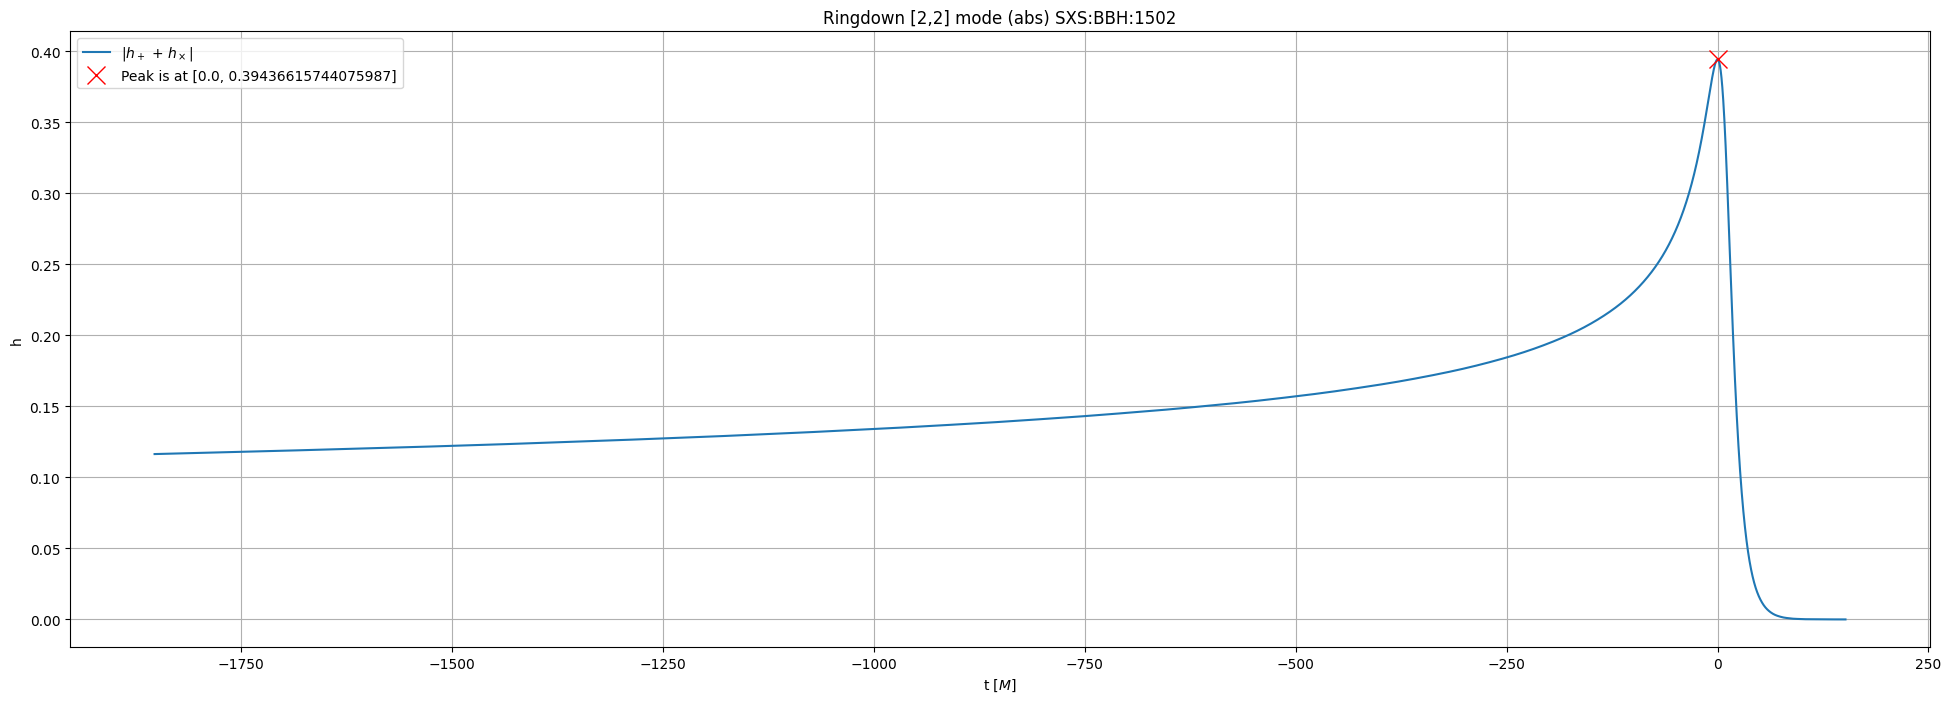

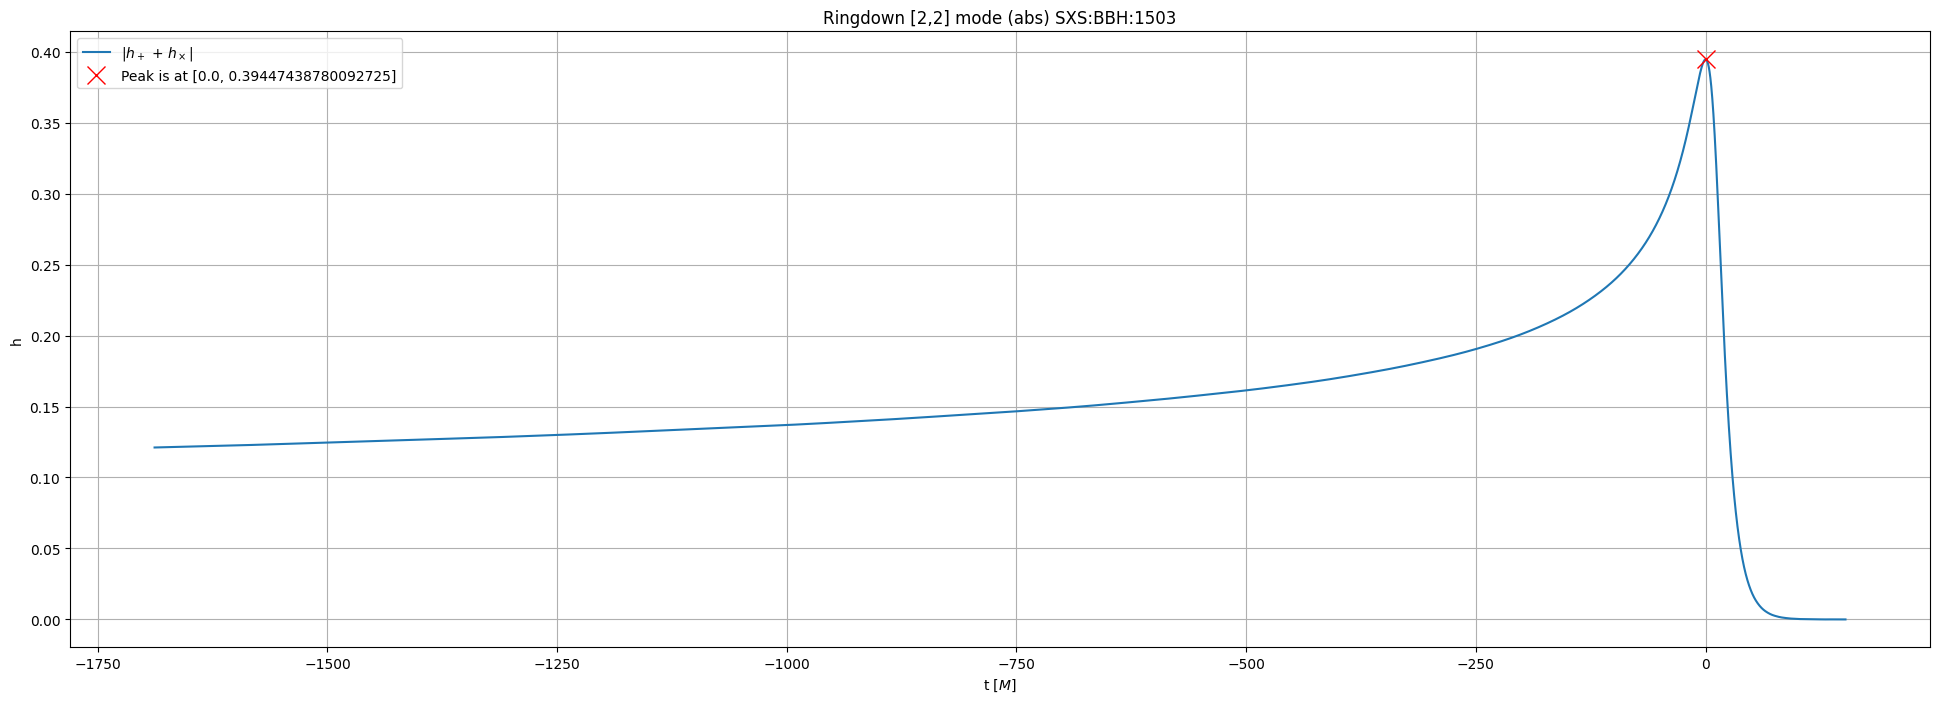

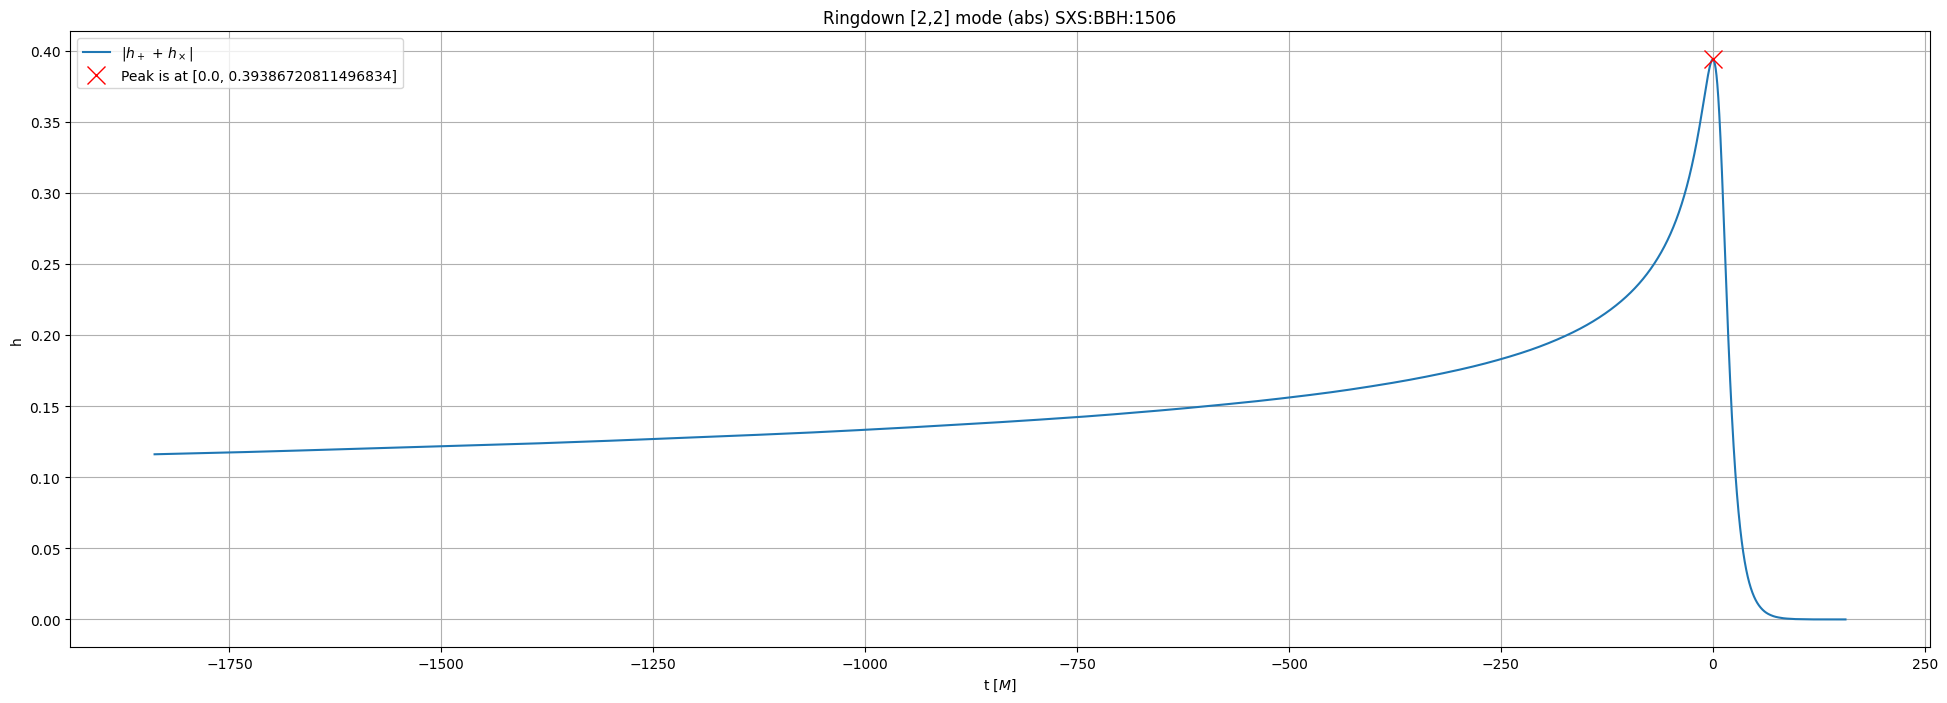

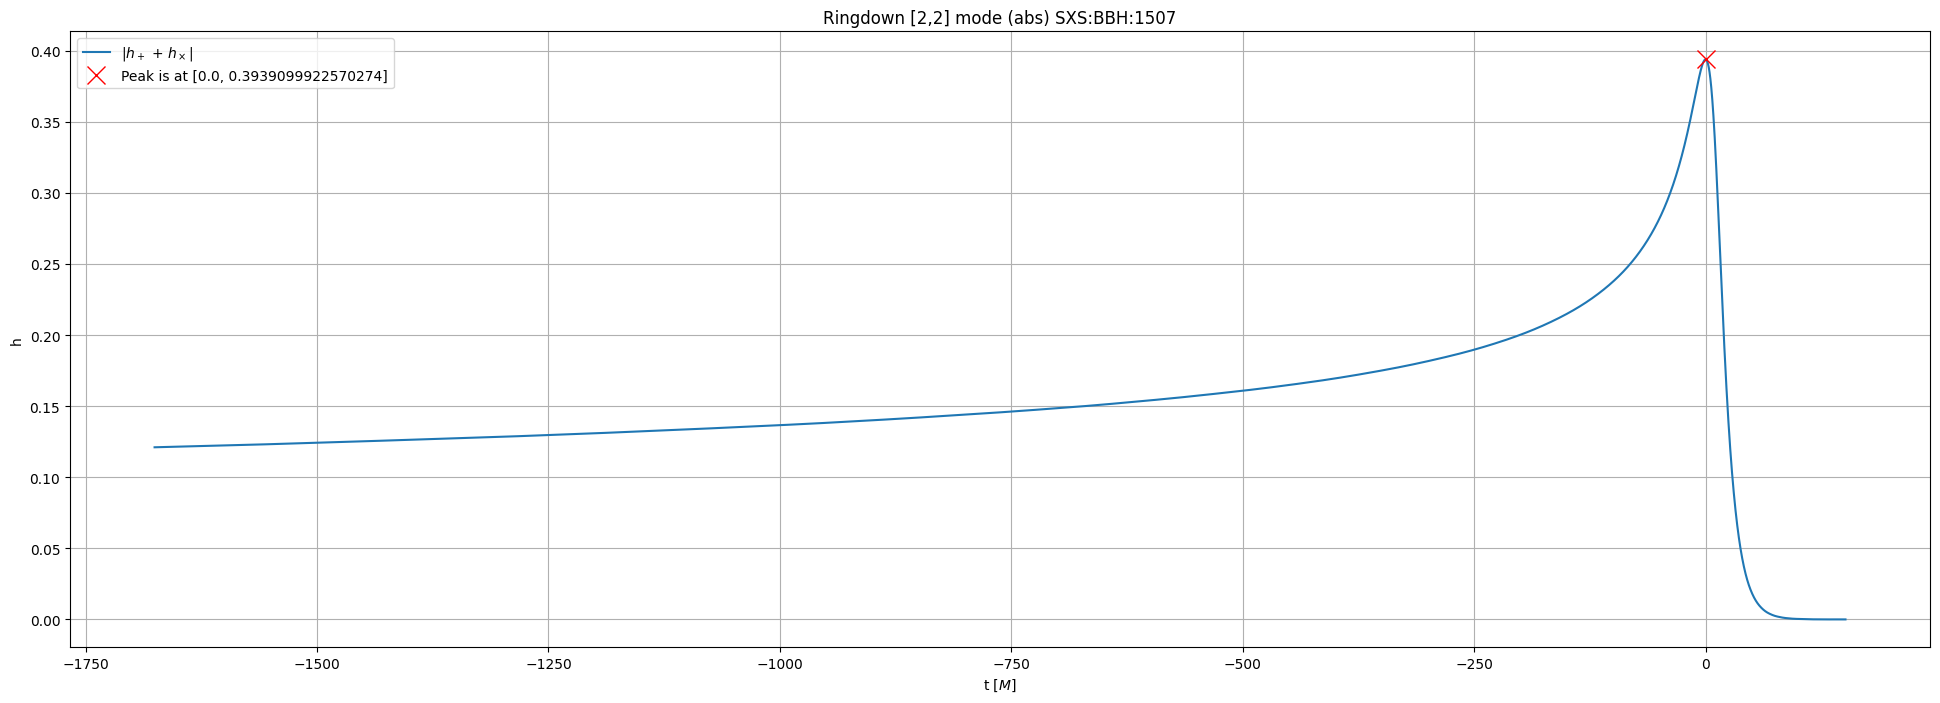

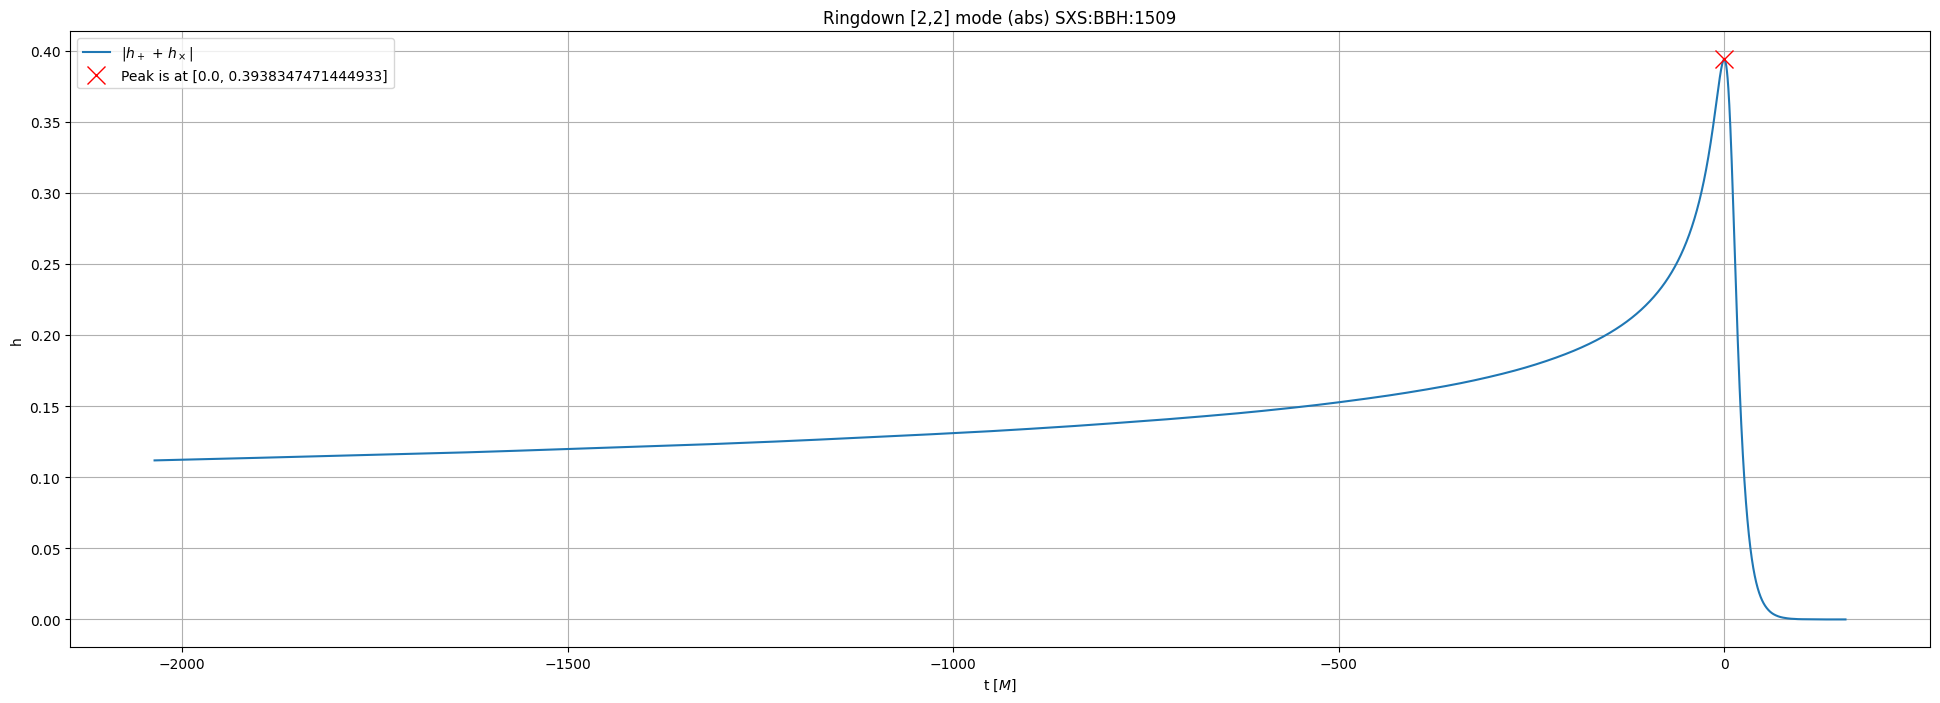

In [51]:
for (sim,ind) in zip(sims,ids):
    fig, ax = plt.subplots(figsize=(24,8))
    ax.plot(sim.times, np.abs(sim.h[2,2]), label = r"|$h_+$ + $h_\times$|")
    ax.grid(which='both')
    ax.set_title(r'Ringdown [2,2] mode (abs) SXS:BBH:' + str(ind))
    ax.set_xlabel(r't [$M$]')
    ax.set_ylabel('h')
    #ax.set_xlim(0,150)


    from scipy.signal import find_peaks

    peak, _ = find_peaks(np.abs(sim.h[2,2]), height=0.35, prominence=0.2)
    p = [sim.times[peak][0],np.abs(sim.h[2,2])[peak][0]]
    ax.plot(p[0],p[1], "xr", markersize = 12.5, label = "Peak is at " + str(p))
    print("Peak is at " + str(p))
    ax.legend(loc='upper left')

    #plt.savefig('ringdownpeak.png', dpi=500, bbox_inches='tight')


    # Save figure
    if not os.path.exists(ringdown_dir):
        os.makedirs(ringdown_dir)
    plt.savefig(ringdown_dir + 'ringdownpeak' + str(ind) + '.png', dpi=500, bbox_inches='tight')
    print('Saved ringdownpeak' + str(ind) + '.png')